# 마라톤 데이터를 통한 분석

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

## 데이터 전처리

### 데이터 불러오기

In [ ]:
nminyear = 2015
nmaxyear = 2017

dict_df_marathon = {}
for i in range(nminyear, nmaxyear+1):
  dict_df_marathon[i] = pd.read_csv('./marathon_results_%d.csv' % i)

In [ ]:
dict_df_marathon[2015].head(4)

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4


In [ ]:
dict_df_marathon[2016].head(2)

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2


In [ ]:
dict_df_marathon[2017].head(4)

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4


2015년 데이터와 2017년 데이터는 불필요한 인덱스 컬럼이 앞에 있음을 확인할 수 있음

In [ ]:
dict_df_marathon[2015] = pd.read_csv('./marathon_results_2015.csv', index_col = 0)
dict_df_marathon[2017] = pd.read_csv('./marathon_results_2017.csv', index_col = 0)

In [ ]:
dict_df_marathon[2015].head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [ ]:
dict_df_marathon[2017].head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,0:15:25,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,0:15:24,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,0:15:25,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,0:15:25,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,0:15:25,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


### 컬럼 비교 후 처리

#### 컬럼 길이 비교

In [ ]:
dict_df_marathon[2015].columns.__len__()

24

In [ ]:
dict_df_marathon[2016].columns.__len__()

24

In [ ]:
dict_df_marathon[2017].columns.__len__()

24

#### 컬럼 이름 비교 및 컬럼 제거

In [ ]:
abcolissame = ((dict_df_marathon[2015].columns == dict_df_marathon[2016].columns) & (dict_df_marathon[2016].columns == dict_df_marathon[2017].columns))
abcolissame

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
~abcolissame

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
print(dict_df_marathon[2015].loc[:, ~abcolissame].columns, dict_df_marathon[2016].loc[:, ~abcolissame].columns, dict_df_marathon[2017].loc[:, ~abcolissame].columns)

Index(['Unnamed: 9'], dtype='object') Index(['Unnamed: 8'], dtype='object') Index(['Unnamed: 9'], dtype='object')


의미를 알 수 없는 컬럼이 포함되어 있으며 해당 컬럼은 분석할 수 없기에 제거

In [ ]:
for i in range(nminyear, nmaxyear+1):
  dict_df_marathon[i].drop(dict_df_marathon[i].loc[:, ~abcolissame].columns, axis = 1, inplace = True)

In [ ]:
abcolissame = ((dict_df_marathon[2015].columns == dict_df_marathon[2016].columns) & (dict_df_marathon[2016].columns == dict_df_marathon[2017].columns))
abcolissame

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

각 데이터의 컬럼 길이와 의미는 이제 같다고 할 수 있음. 단, 아직 값을 표현하는 형식은 같다고 확신할 수 없음

### Nan 값 분석

<Axes: >

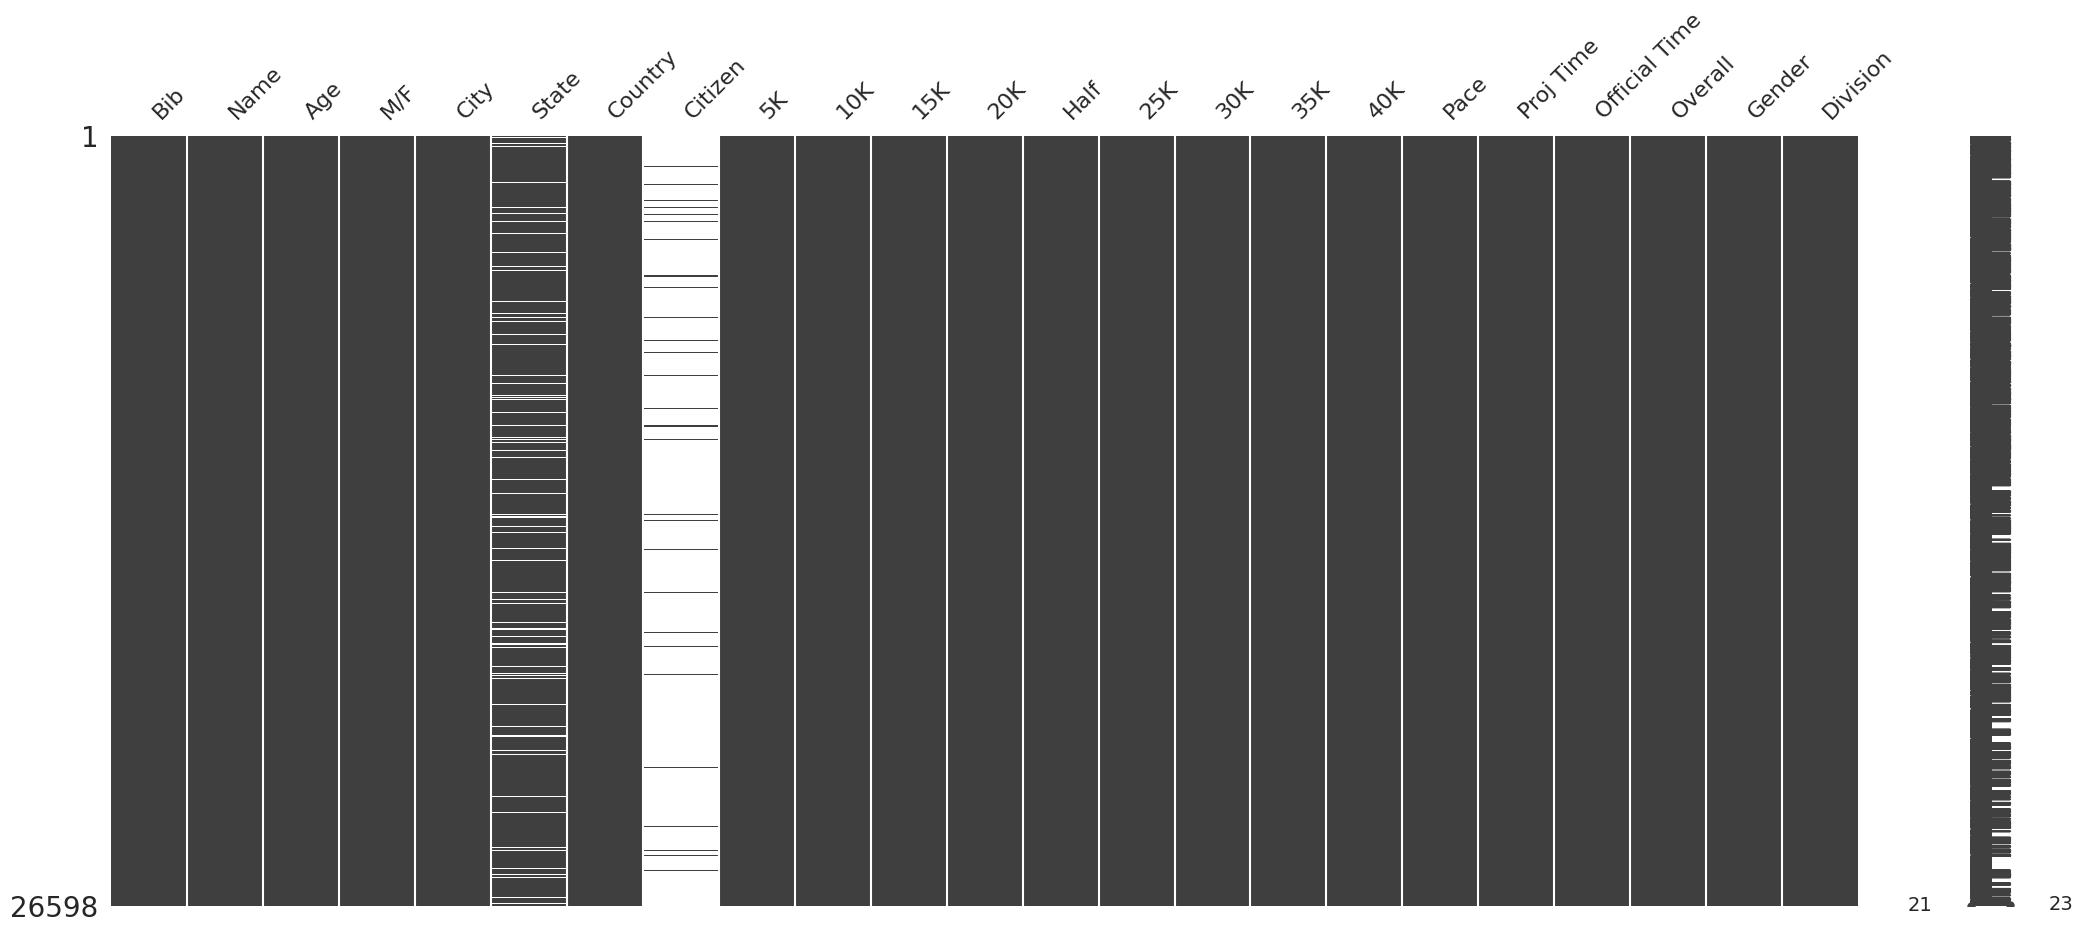

In [ ]:
msno.matrix(dict_df_marathon[2015])

<Axes: >

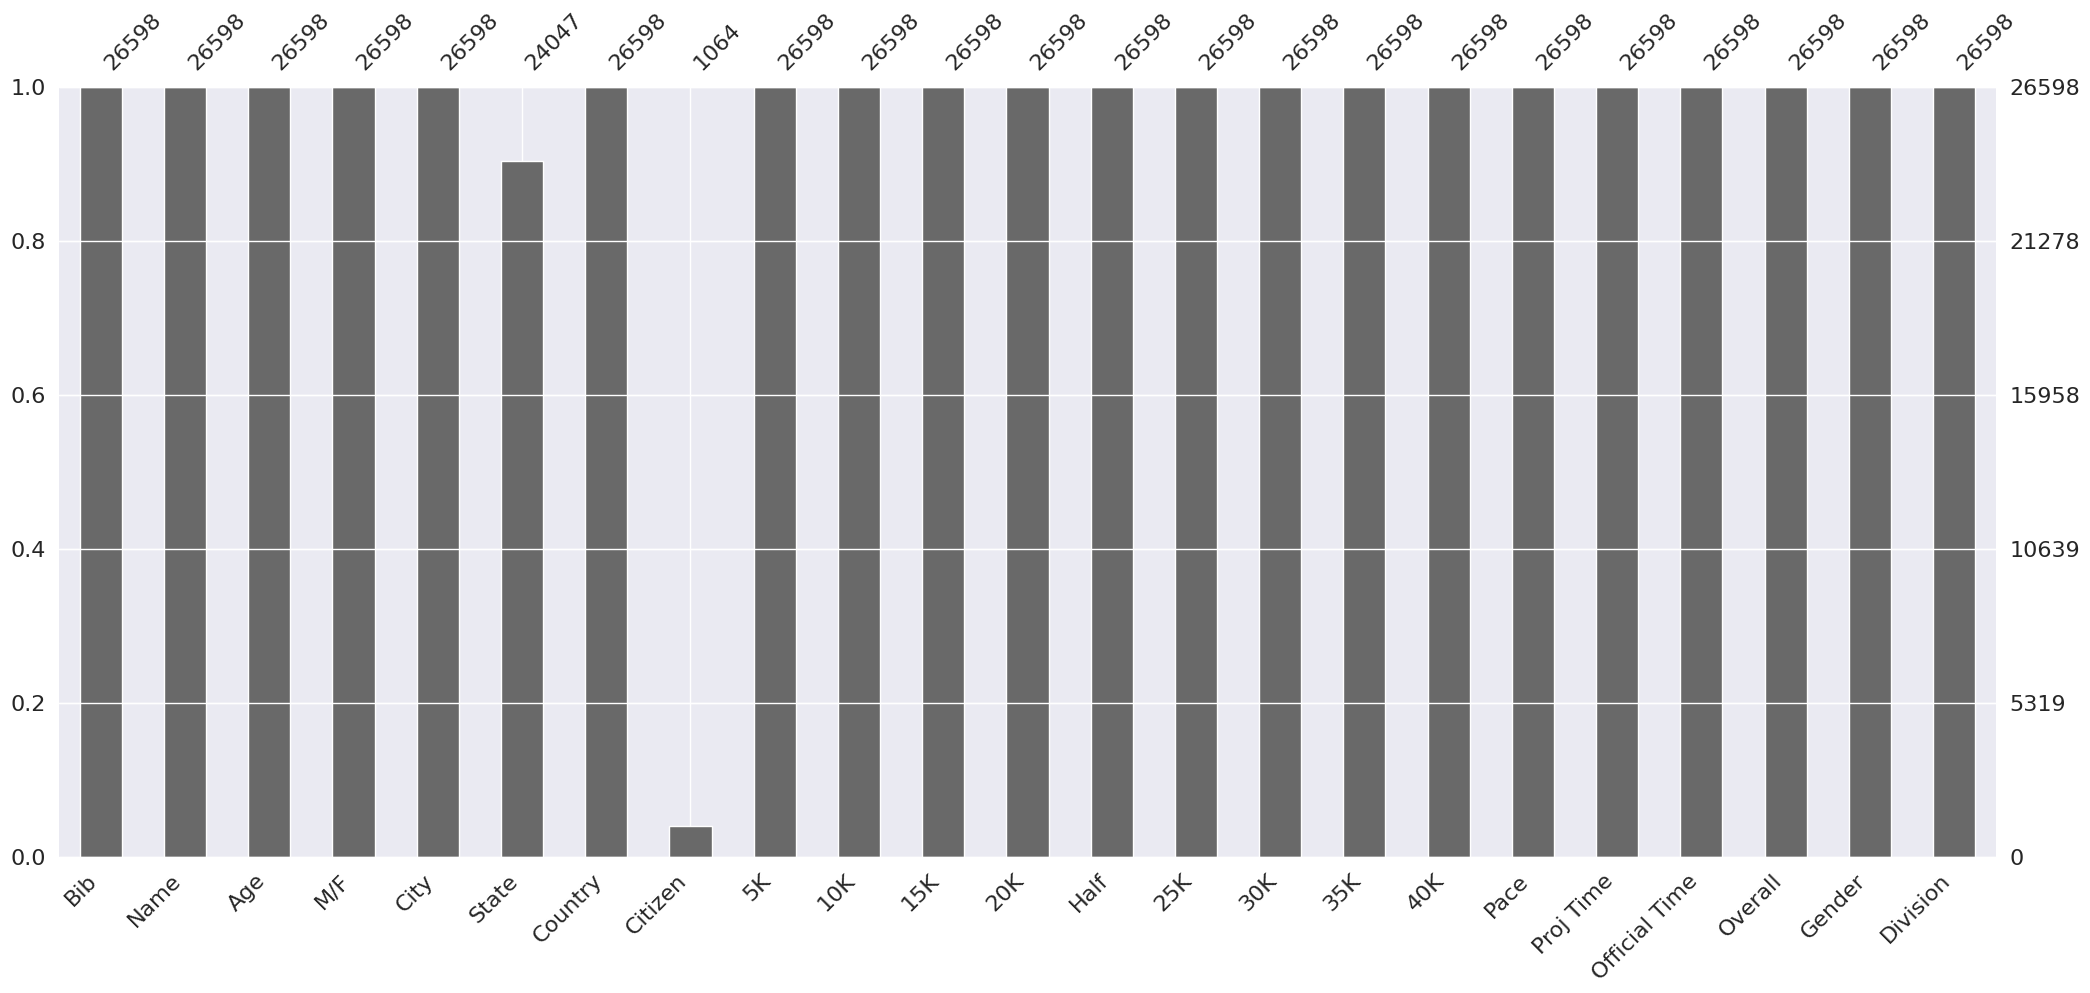

In [ ]:
msno.bar(dict_df_marathon[2015])

In [ ]:
nyear = 2015

dfTemp = pd.DataFrame(((dict_df_marathon[nyear].isnull().sum() / dict_df_marathon[nyear].shape[0]) * 100).apply("{:.4f}%".format), columns = ['Missing Percent'])
dfTemp['Missing Count'] = dict_df_marathon[nyear].isnull().sum()
dfTemp['Total Count'] = dict_df_marathon[nyear].shape[0]
print(f"{nyear} Year Missing Value-------------")
dfTemp.sort_values('Missing Count', ascending = False)

2015 Year Missing Value-------------


,Missing Percent,Missing Count,Total Count
Citizen,95.9997%,25534,26598
State,9.5909%,2551,26598
Bib,0.0000%,0,26598
25K,0.0000%,0,26598
Gender,0.0000%,0,26598
Overall,0.0000%,0,26598
Official Time,0.0000%,0,26598
Proj Time,0.0000%,0,26598
Pace,0.0000%,0,26598
40K,0.0000%,0,26598


<Axes: >

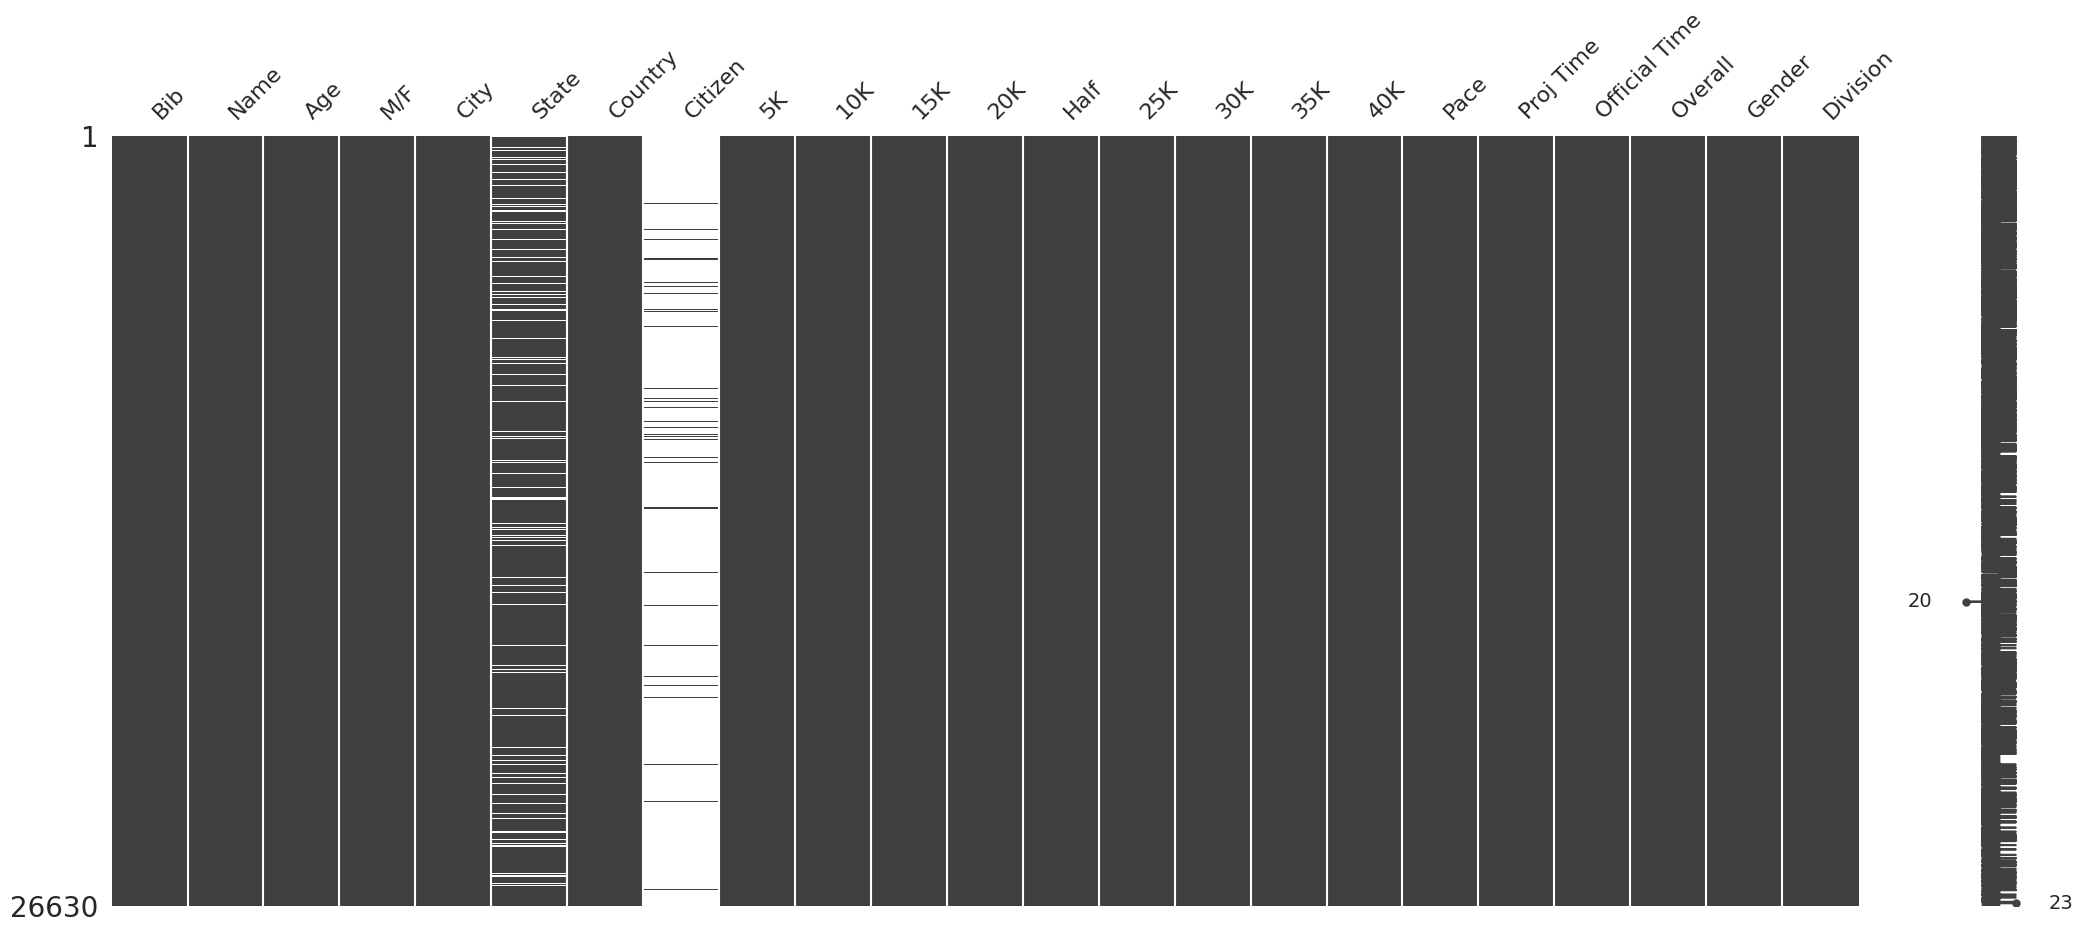

In [ ]:
msno.matrix(dict_df_marathon[2016])

<Axes: >

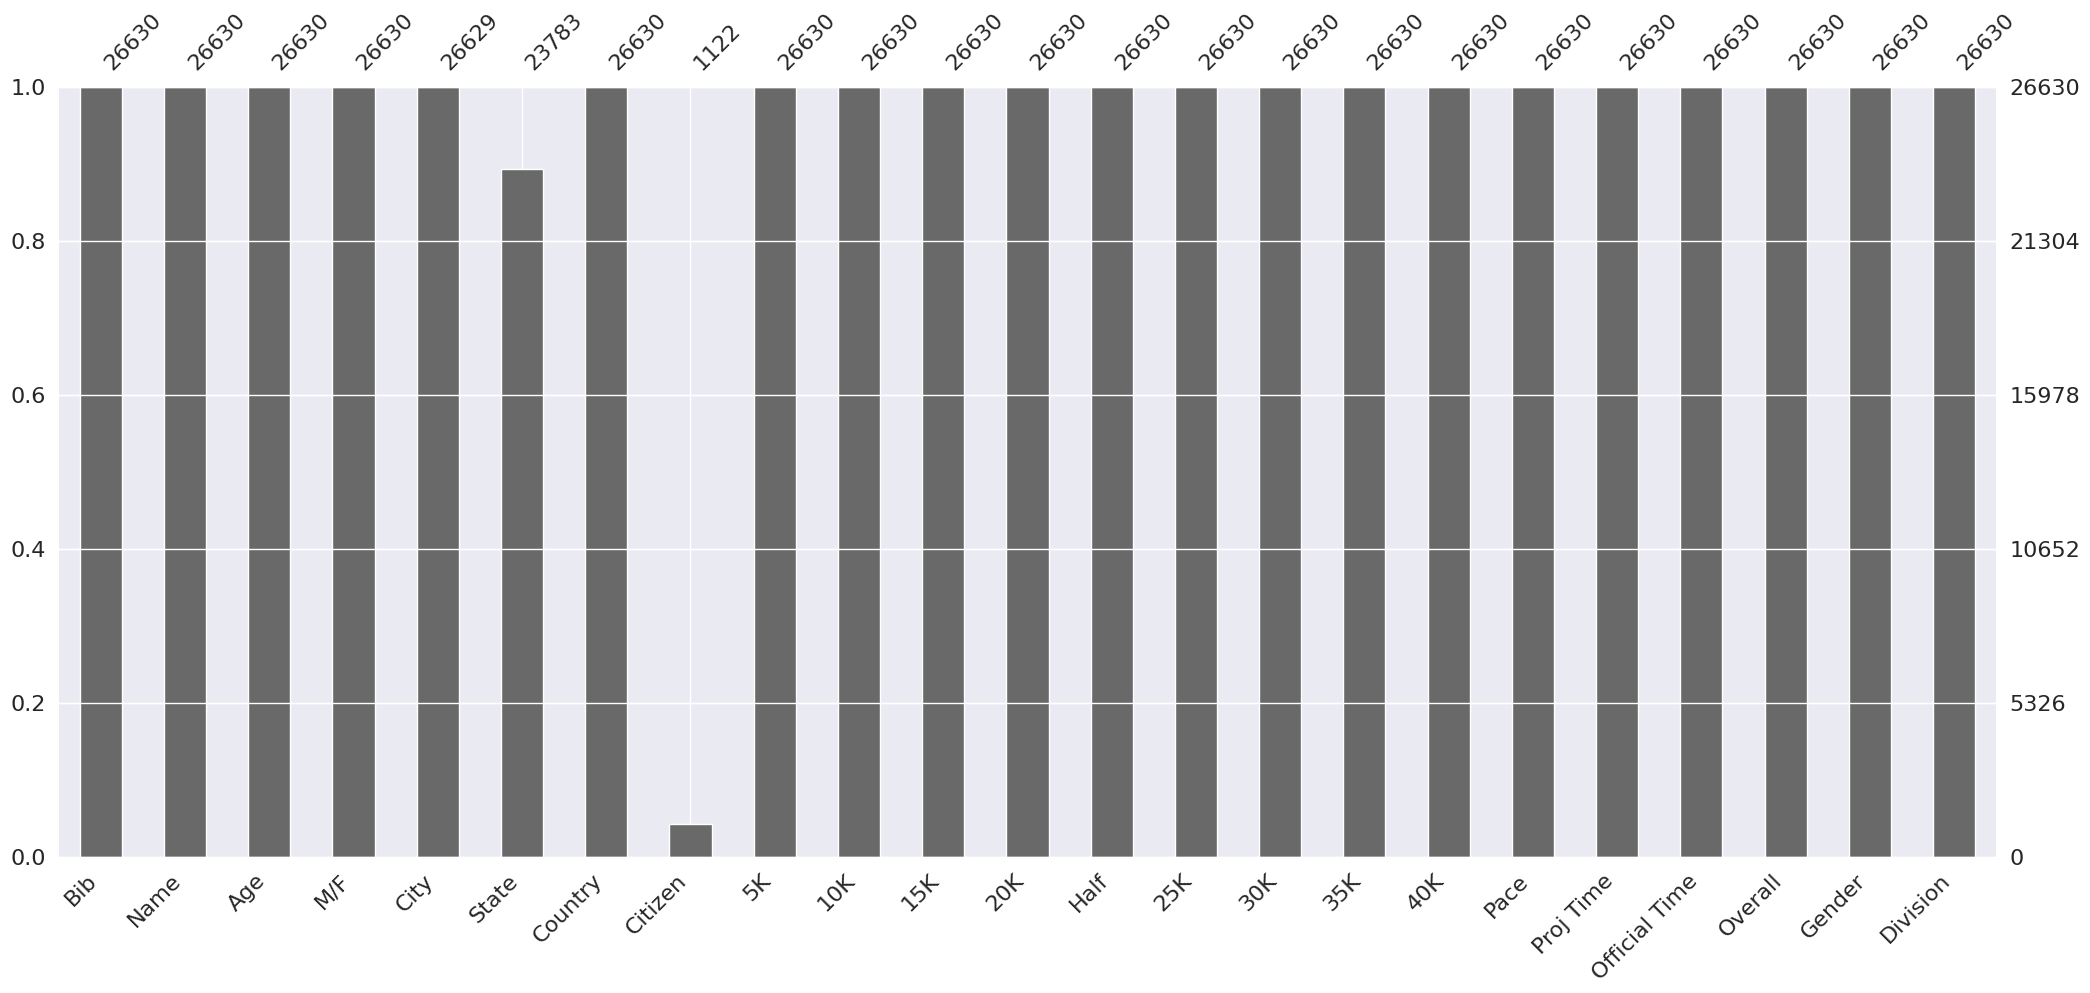

In [ ]:
msno.bar(dict_df_marathon[2016])

In [ ]:
nyear = 2016

dfTemp = pd.DataFrame(((dict_df_marathon[nyear].isnull().sum() / dict_df_marathon[nyear].shape[0]) * 100).apply("{:.4f}%".format), columns = ['Missing Percent'])
dfTemp['Missing Count'] = dict_df_marathon[nyear].isnull().sum()
dfTemp['Total Count'] = dict_df_marathon[nyear].shape[0]
print(f"{nyear} Year Missing Value-------------")
dfTemp.sort_values('Missing Count', ascending = False)

2016 Year Missing Value-------------


,Missing Percent,Missing Count,Total Count
Citizen,95.7867%,25508,26630
State,10.6910%,2847,26630
City,0.0038%,1,26630
Bib,0.0000%,0,26630
25K,0.0000%,0,26630
Gender,0.0000%,0,26630
Overall,0.0000%,0,26630
Official Time,0.0000%,0,26630
Proj Time,0.0000%,0,26630
Pace,0.0000%,0,26630


다른 파일과 달리 City 열에 Nan 값이 있음을 확인할 수 있음

<Axes: >

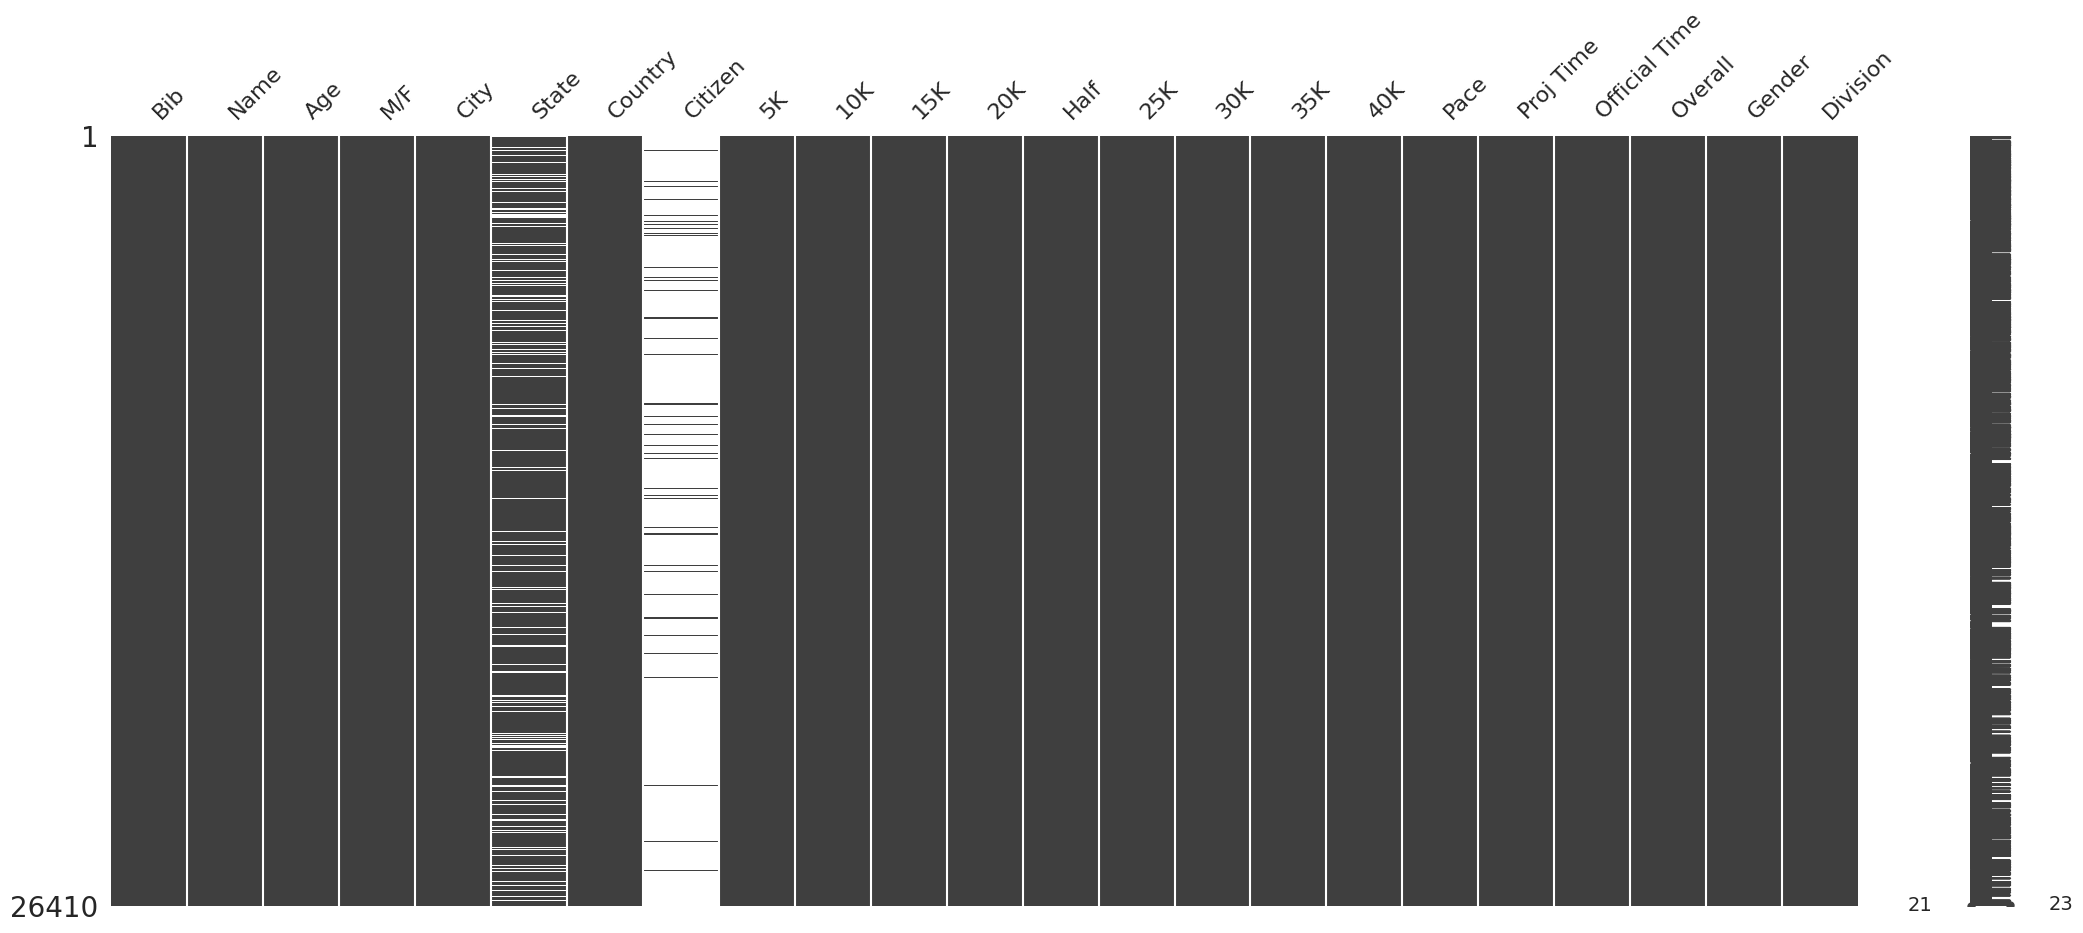

In [ ]:
msno.matrix(dict_df_marathon[2017])

<Axes: >

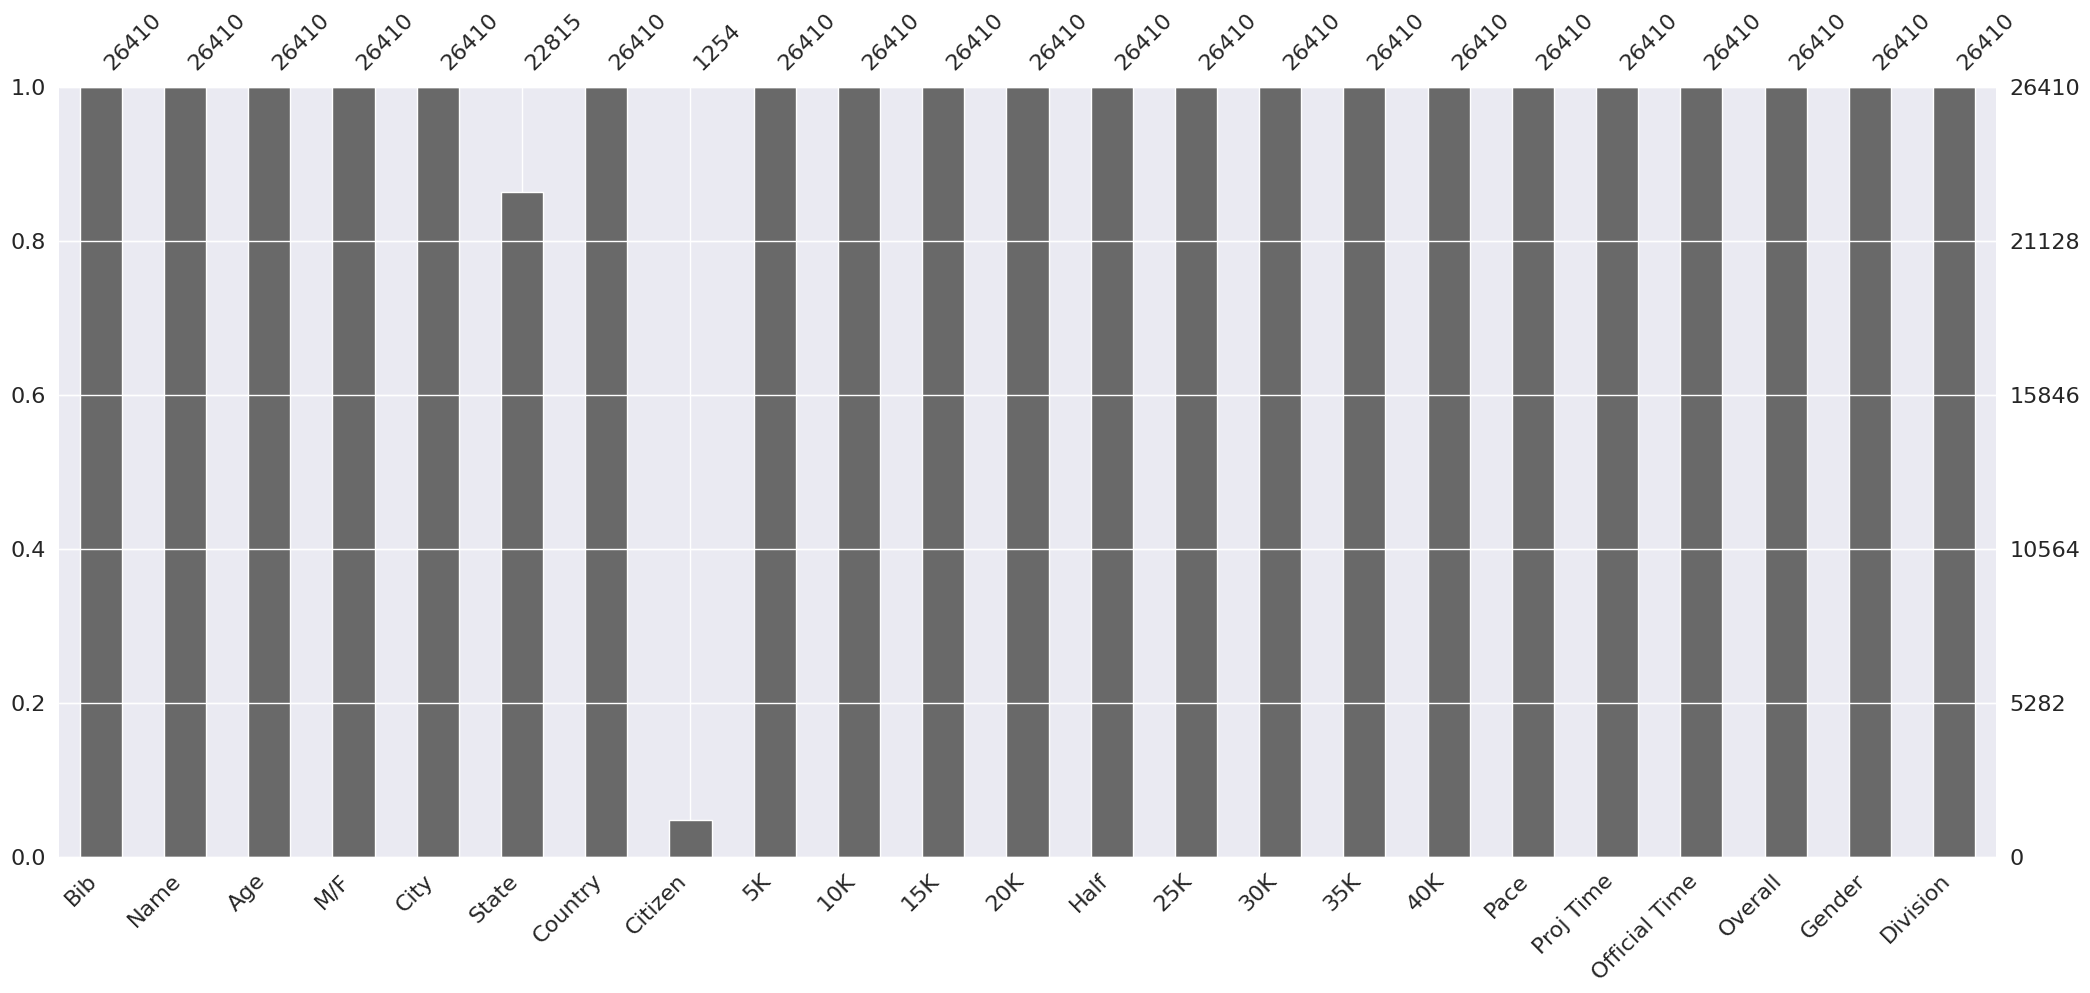

In [ ]:
msno.bar(dict_df_marathon[2017])

In [ ]:
nyear = 2017

dfTemp = pd.DataFrame(((dict_df_marathon[nyear].isnull().sum() / dict_df_marathon[nyear].shape[0]) * 100).apply("{:.4f}%".format), columns = ['Missing Percent'])
dfTemp['Missing Count'] = dict_df_marathon[nyear].isnull().sum()
dfTemp['Total Count'] = dict_df_marathon[nyear].shape[0]
print(f"{nyear} Year Missing Value-------------")
dfTemp.sort_values('Missing Count', ascending = False)

2017 Year Missing Value-------------


,Missing Percent,Missing Count,Total Count
Citizen,95.2518%,25156,26410
State,13.6123%,3595,26410
Bib,0.0000%,0,26410
25K,0.0000%,0,26410
Gender,0.0000%,0,26410
Overall,0.0000%,0,26410
Official Time,0.0000%,0,26410
Proj Time,0.0000%,0,26410
Pace,0.0000%,0,26410
40K,0.0000%,0,26410


해당 그래프를 통해 State와 Citizen에 비어있는 데이터가 많음을 확인할 수 있음   
특히 Citizen은 값이 너무 비어있기 때문에 컬럼을 제거하는 것도 고려해야 함

### 각 파일의 값 형식 비교

#### 데이터 타입 비교

In [ ]:
dict_df_marathon[2015].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26598 entries, 0 to 26597
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Bib            26598 non-null  object
 1   Name           26598 non-null  object
 2   Age            26598 non-null  int64 
 3   M/F            26598 non-null  object
 4   City           26598 non-null  object
 5   State          24047 non-null  object
 6   Country        26598 non-null  object
 7   Citizen        1064 non-null   object
 8   5K             26598 non-null  object
 9   10K            26598 non-null  object
 10  15K            26598 non-null  object
 11  20K            26598 non-null  object
 12  Half           26598 non-null  object
 13  25K            26598 non-null  object
 14  30K            26598 non-null  object
 15  35K            26598 non-null  object
 16  40K            26598 non-null  object
 17  Pace           26598 non-null  object
 18  Proj Time      26598 non-n

In [ ]:
dict_df_marathon[2016].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26630 entries, 0 to 26629
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Bib            26630 non-null  object
 1   Name           26630 non-null  object
 2   Age            26630 non-null  int64 
 3   M/F            26630 non-null  object
 4   City           26629 non-null  object
 5   State          23783 non-null  object
 6   Country        26630 non-null  object
 7   Citizen        1122 non-null   object
 8   5K             26630 non-null  object
 9   10K            26630 non-null  object
 10  15K            26630 non-null  object
 11  20K            26630 non-null  object
 12  Half           26630 non-null  object
 13  25K            26630 non-null  object
 14  30K            26630 non-null  object
 15  35K            26630 non-null  object
 16  40K            26630 non-null  object
 17  Pace           26630 non-null  object
 18  Proj Time      26630 non-n

In [ ]:
dict_df_marathon[2017].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26410 entries, 0 to 26409
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Bib            26410 non-null  object
 1   Name           26410 non-null  object
 2   Age            26410 non-null  int64 
 3   M/F            26410 non-null  object
 4   City           26410 non-null  object
 5   State          22815 non-null  object
 6   Country        26410 non-null  object
 7   Citizen        1254 non-null   object
 8   5K             26410 non-null  object
 9   10K            26410 non-null  object
 10  15K            26410 non-null  object
 11  20K            26410 non-null  object
 12  Half           26410 non-null  object
 13  25K            26410 non-null  object
 14  30K            26410 non-null  object
 15  35K            26410 non-null  object
 16  40K            26410 non-null  object
 17  Pace           26410 non-null  object
 18  Proj Time      26410 non-n

In [ ]:
(~((dict_df_marathon[2015].dtypes == dict_df_marathon[2016].dtypes) & (dict_df_marathon[2016].dtypes == dict_df_marathon[2017].dtypes))).any()

False

any()는 하나라도 True이면 True 반환. dtypes이 같은지 전부 비교 한다음 해당 비교를 반전함    
=> 같지 않은 경우가 True가 됨 => 같지 않은 경우가 있다면 True로 나올것이라 판단 가능 => False가 나옴 => dtypes는 모두 같다고 볼 수 있다.

#### 수치형 데이터 컬럼 값의 비교

In [ ]:
dict_df_marathon[2015].describe()

,Age,Overall,Gender,Division
count,26598.000000,26598.000000,26598.000000,26598.000000
mean,42.144823,13299.500000,6711.791263,1654.040417
std,11.294531,7678.325566,3944.254734,1477.112437
min,18.000000,1.000000,1.000000,1.000000
25%,33.000000,6650.250000,3325.250000,518.000000
50%,42.000000,13299.500000,6650.000000,1205.000000
75%,50.000000,19948.750000,9974.750000,2268.000000
max,82.000000,26598.000000,14581.000000,6004.000000


In [ ]:
dict_df_marathon[2016].describe()

,Age,Overall,Gender,Division
count,26630.000000,26630.000000,26630.000000,26630.000000
mean,42.514044,13314.764176,6707.085242,1613.305896
std,11.347955,7687.226481,3928.246611,1443.420260
min,18.000000,1.000000,1.000000,1.000000
25%,34.000000,6658.250000,3329.000000,510.000000
50%,43.000000,13314.500000,6657.500000,1180.000000
75%,51.000000,19971.750000,9986.000000,2198.000000
max,83.000000,26629.000000,14463.000000,5946.000000


In [ ]:
dict_df_marathon[2017].describe()

,Age,Overall,Gender,Division
count,26410.000000,26410.000000,26410.000000,26410.000000
mean,42.587732,13206.260091,6660.973230,1588.796706
std,11.419467,7624.370496,3910.031525,1423.199500
min,18.000000,1.000000,1.000000,1.000000
25%,34.000000,6604.250000,3302.250000,502.000000
50%,43.000000,13206.500000,6603.500000,1154.000000
75%,51.000000,19808.750000,9904.750000,2190.750000
max,84.000000,26411.000000,14438.000000,5846.000000


직관적으로 값의 표현 범위가 비슷함을 알 수 있음

#### 오브젝트 데이터 컬럼 값의 비교

In [ ]:
dict_df_marathon[2015].describe(include =['O'])

,Bib,Name,M/F,City,State,Country,Citizen,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time
count,26598,26598,26598,26598,24047,26598,1064,26598,26598,26598,26598,26598,26598,26598,26598,26598,26598,26598,26598
unique,26598,26540,2,5616,69,79,82,1328,2435,3480,4541,4746,5573,6545,7530,8380,555,1,8718
top,3,"Morgan, John",M,Boston,MA,USA,CAN,-,0:48:34,1:13:00,-,-,-,-,-,-,0:07:58,-,3:40:12
freq,1,3,14581,686,4694,21880,136,152,44,31,29,28,31,39,51,56,173,26598,15


In [ ]:
dict_df_marathon[2016].describe(include =['O'])

,Bib,Name,M/F,City,State,Country,Citizen,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time
count,26630,26630,26630,26629,23783,26630,1122,26630,26630,26630,26630,26630,26630,26630,26630,26630,26630,26630,26630
unique,26630,26559,2,5832,67,79,90,1299,2460,3549,4600,4825,5688,6715,7763,8610,546,8891,8901
top,5,"Brown, Lisa",M,Boston,MA,USA,CAN,0:24:45,0:48:55,1:13:32,1:38:27,1:44:40,2:05:51,-,3:03:19,3:40:02,0:08:23,-,3:27:48
freq,1,3,14463,722,4636,21649,133,72,41,33,27,24,20,24,19,14,158,109,15


In [ ]:
dict_df_marathon[2017].describe(include =['O'])

,Bib,Name,M/F,City,State,Country,Citizen,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time
count,26410,26410,26410,26410,22815,26410,1254,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410
unique,26410,26365,2,5926,68,91,85,1327,2475,3597,4719,4921,5808,6916,7999,8944,561,1,9269
top,11,"Sullivan, Tim",M,Boston,MA,USA,GBR,0:24:38,-,1:13:50,-,1:44:55,-,-,-,3:32:23,0:08:43,-,3:44:25
freq,1,2,14438,702,4586,20945,141,69,54,29,33,26,40,25,23,14,157,26410,13


'-' 값 때문에 뭐가 뭔지 알수가 없음

In [ ]:
print(dict_df_marathon[2017].loc[dict_df_marathon[2017]['10K'] == '-', '10K'].head())
print()
print(dict_df_marathon[2017].loc[dict_df_marathon[2017]['10K'] != '-', '10K'].head())

2301    -
2482    -
2608    -
3176    -
3690    -
Name: 10K, dtype: object

0    0:30:28
1    0:30:27
2    0:30:29
3    0:30:29
4    0:30:28
Name: 10K, dtype: object


직관적으로 해당 부분은 Nan값과 동일함을 알 수 있음  -> Nan값으로 변환 후 다시 Nan 분석하기

In [ ]:
dict_df_marathon[2015].replace(['-'], np.nan, inplace=True)
dict_df_marathon[2016].replace(['-'], np.nan, inplace=True)
dict_df_marathon[2017].replace(['-'], np.nan, inplace=True)

##### Nan 값 분석

<Axes: >

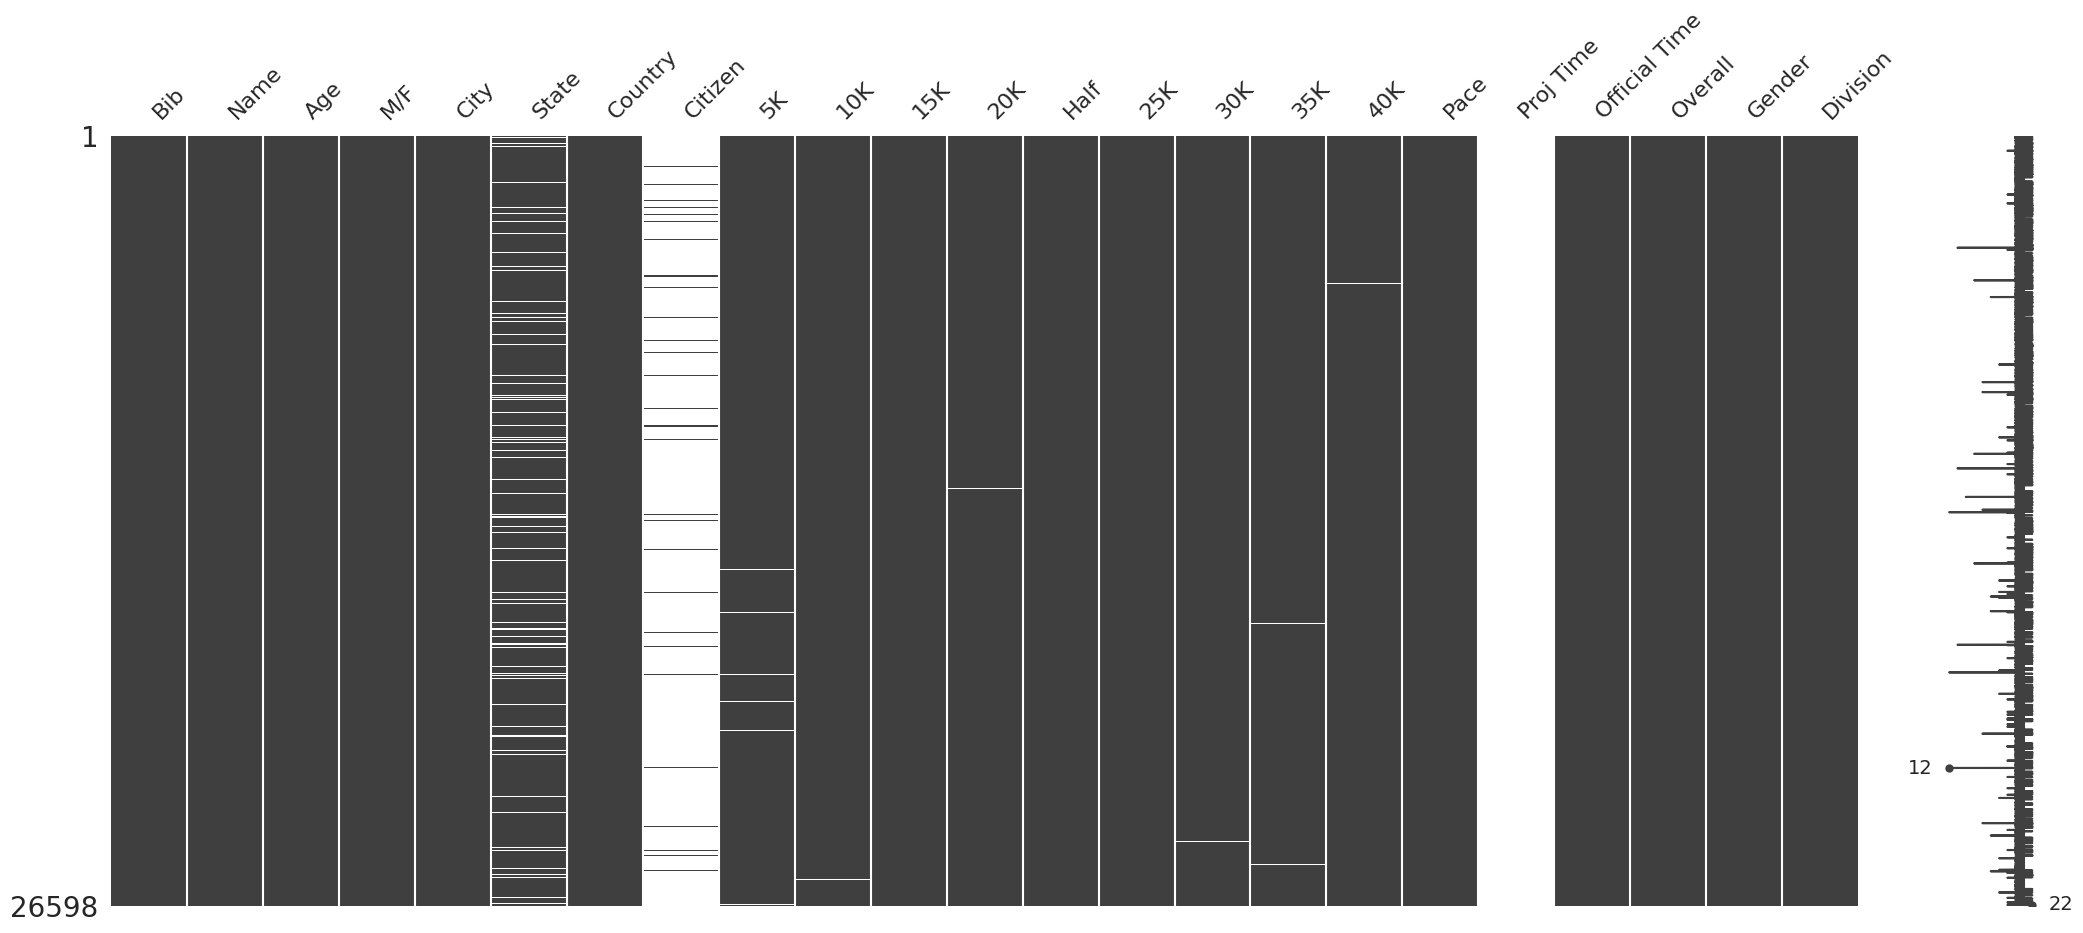

In [ ]:
msno.matrix(dict_df_marathon[2015])

<Axes: >

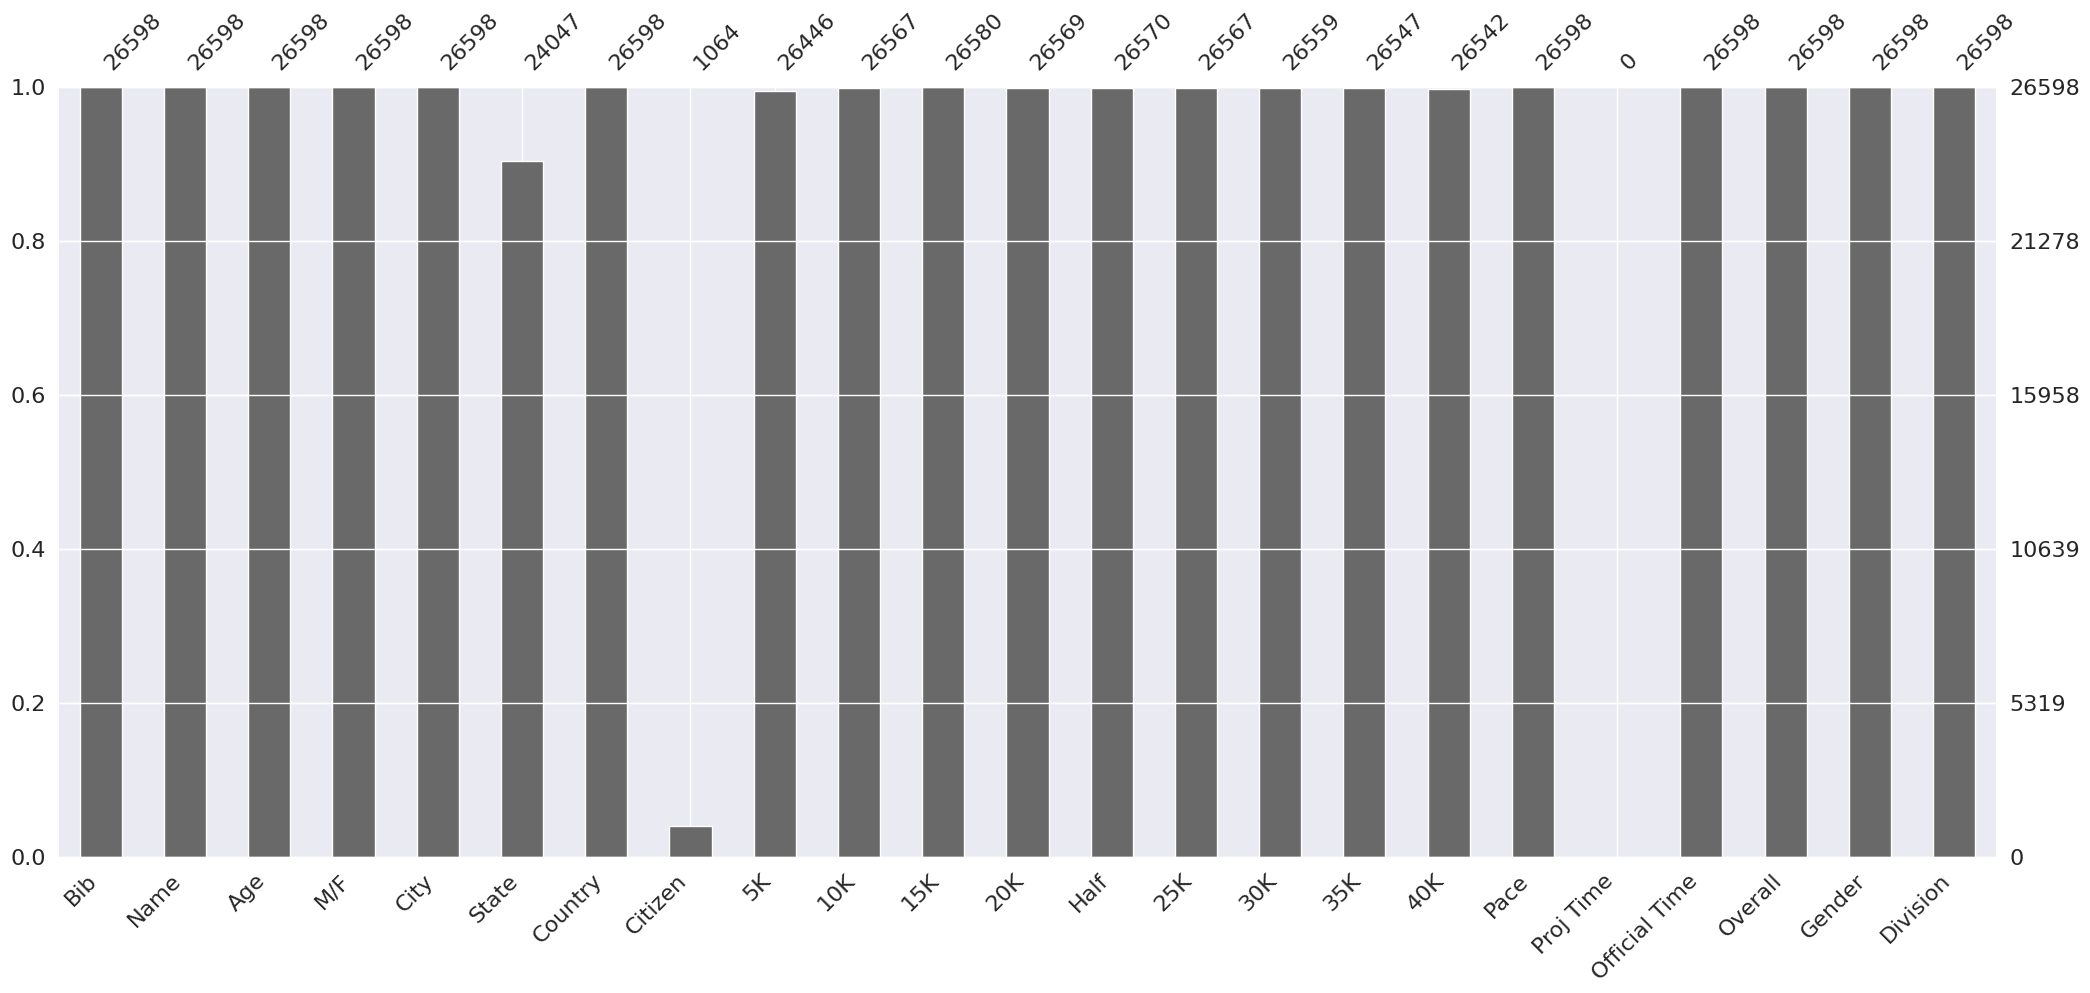

In [ ]:
msno.bar(dict_df_marathon[2015])

In [ ]:
nyear = 2015

dfTemp = pd.DataFrame(((dict_df_marathon[nyear].isnull().sum() / dict_df_marathon[nyear].shape[0]) * 100).apply("{:.4f}%".format), columns = ['Missing Percent'])
dfTemp['Missing Count'] = dict_df_marathon[nyear].isnull().sum()
dfTemp['Total Count'] = dict_df_marathon[nyear].shape[0]
print(f"{nyear} Year Missing Value-------------")
dfTemp.sort_values('Missing Count', ascending = False)

2015 Year Missing Value-------------


,Missing Percent,Missing Count,Total Count
Proj Time,100.0000%,26598,26598
Citizen,95.9997%,25534,26598
State,9.5909%,2551,26598
5K,0.5715%,152,26598
40K,0.2105%,56,26598
35K,0.1917%,51,26598
30K,0.1466%,39,26598
10K,0.1166%,31,26598
25K,0.1166%,31,26598
20K,0.1090%,29,26598


<Axes: >

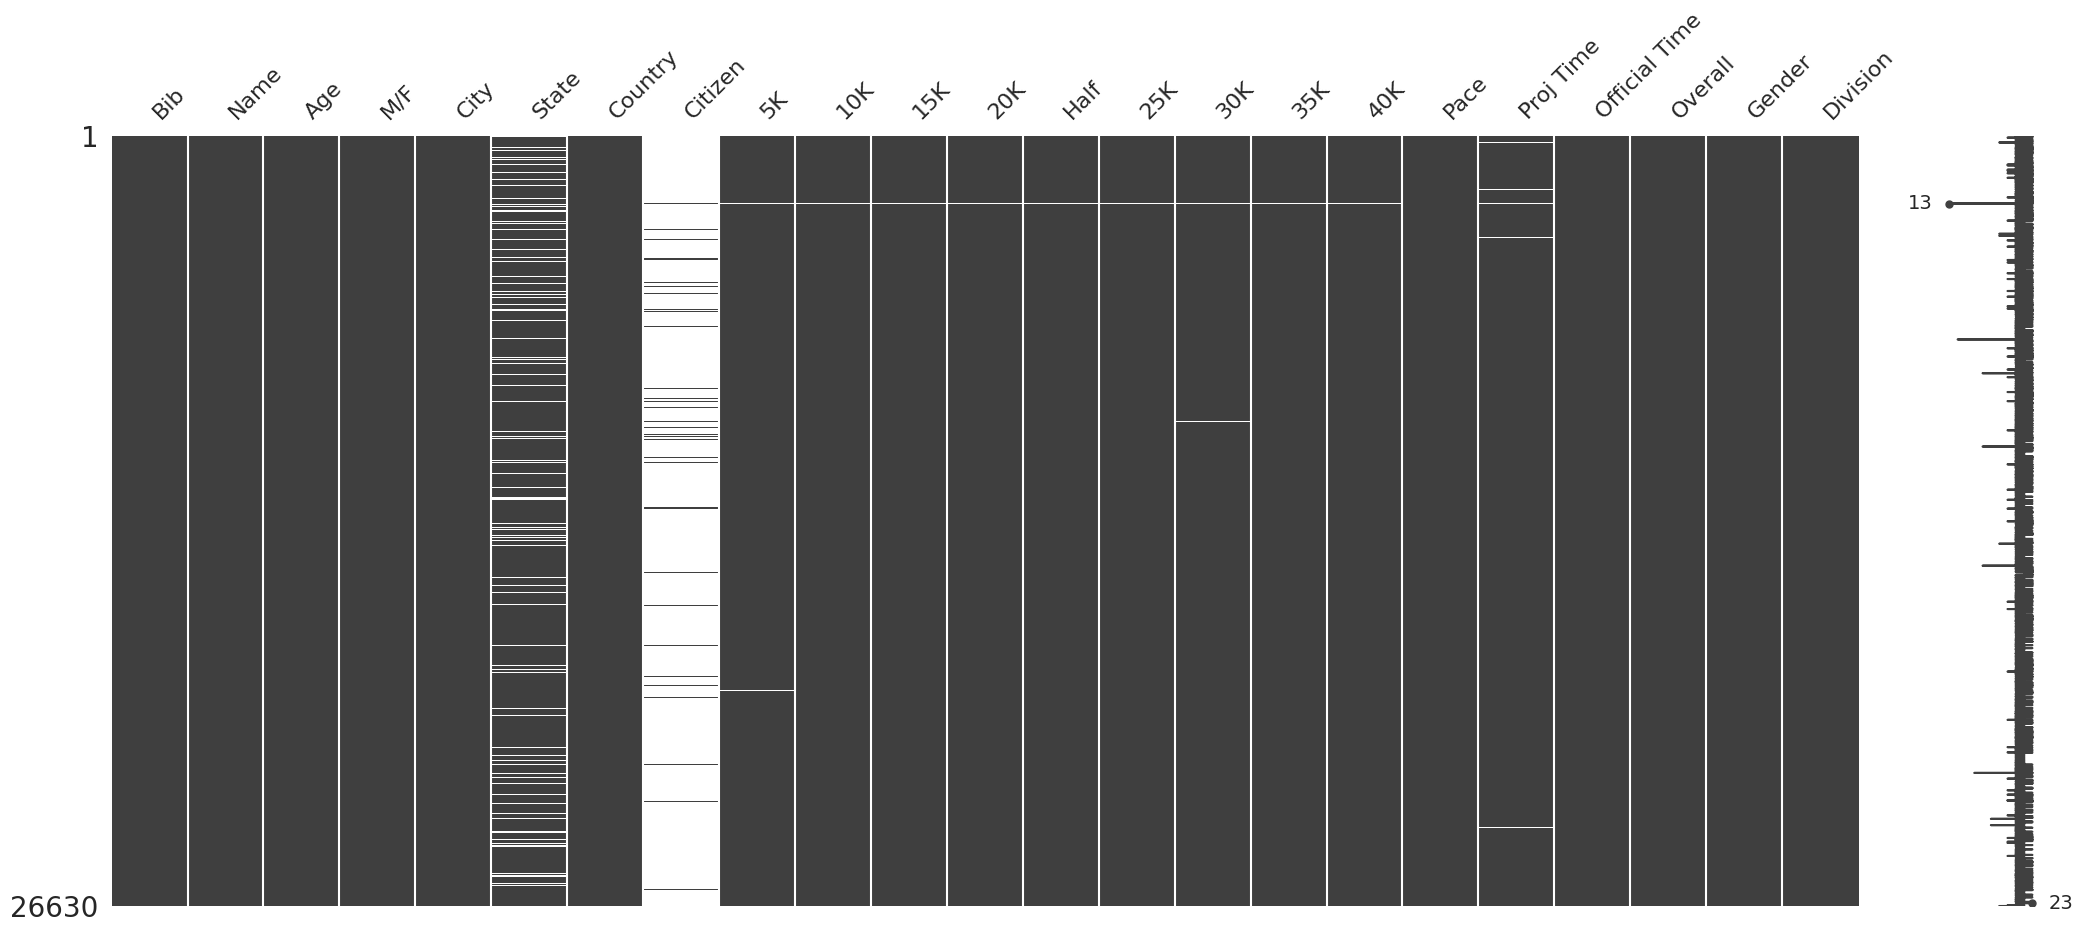

In [ ]:
msno.matrix(dict_df_marathon[2016])

<Axes: >

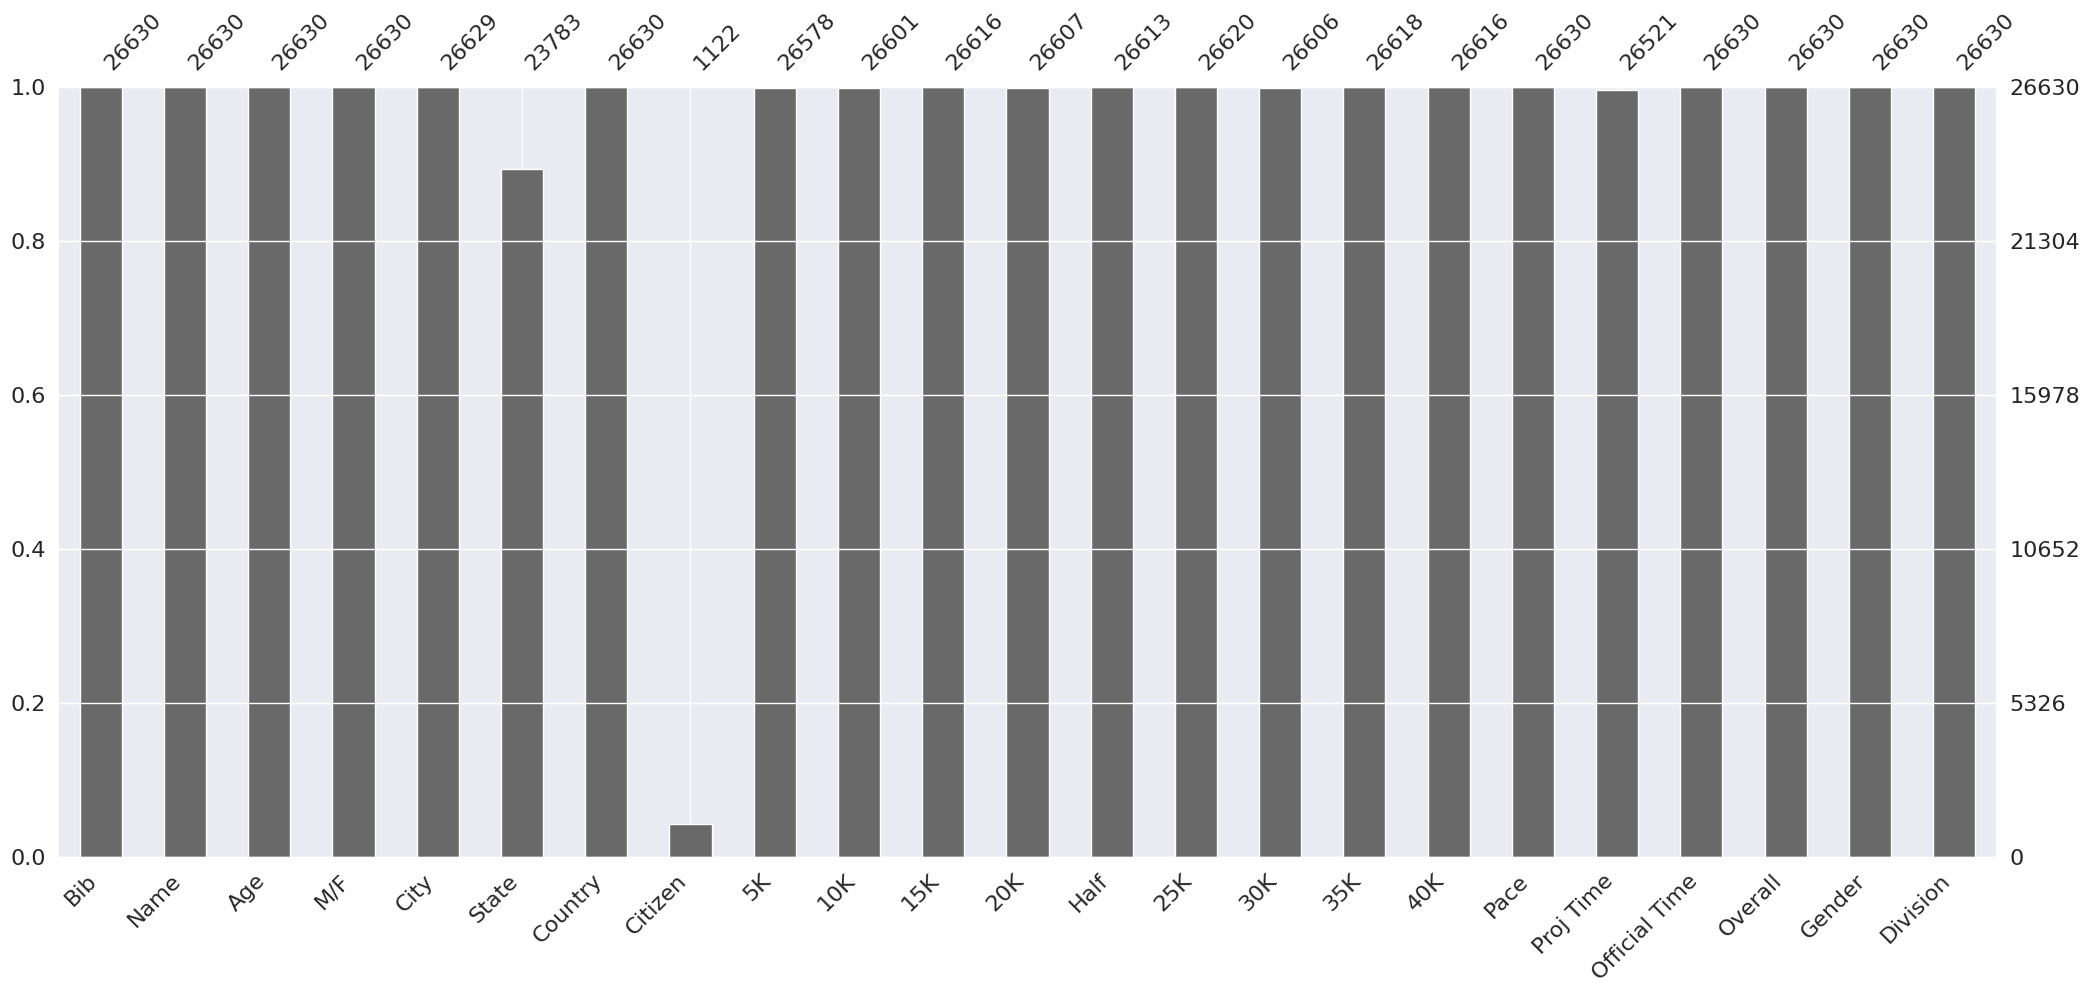

In [ ]:
msno.bar(dict_df_marathon[2016])

In [ ]:
nyear = 2016

dfTemp = pd.DataFrame(((dict_df_marathon[nyear].isnull().sum() / dict_df_marathon[nyear].shape[0]) * 100).apply("{:.4f}%".format), columns = ['Missing Percent'])
dfTemp['Missing Count'] = dict_df_marathon[nyear].isnull().sum()
dfTemp['Total Count'] = dict_df_marathon[nyear].shape[0]
print(f"{nyear} Year Missing Value-------------")
dfTemp.sort_values('Missing Count', ascending = False)

2016 Year Missing Value-------------


,Missing Percent,Missing Count,Total Count
Citizen,95.7867%,25508,26630
State,10.6910%,2847,26630
Proj Time,0.4093%,109,26630
5K,0.1953%,52,26630
10K,0.1089%,29,26630
30K,0.0901%,24,26630
20K,0.0864%,23,26630
Half,0.0638%,17,26630
15K,0.0526%,14,26630
40K,0.0526%,14,26630


<Axes: >

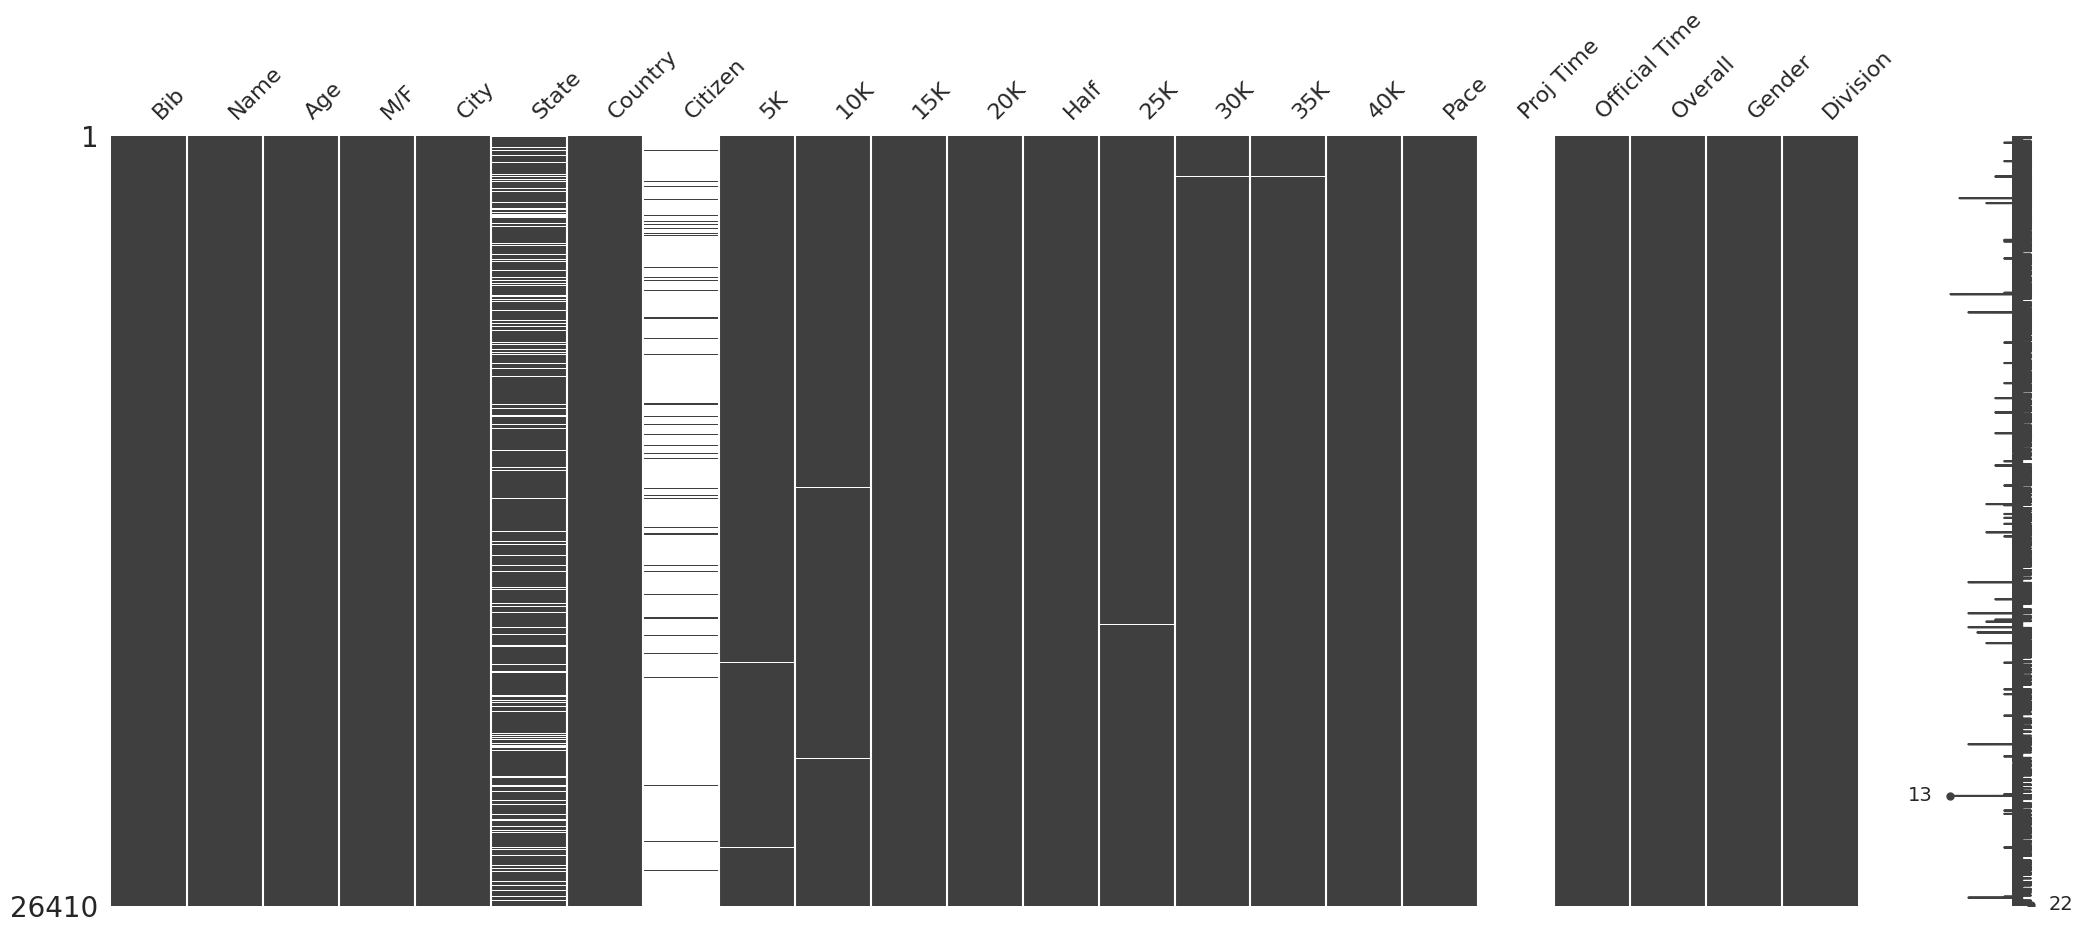

In [ ]:
msno.matrix(dict_df_marathon[2017])

<Axes: >

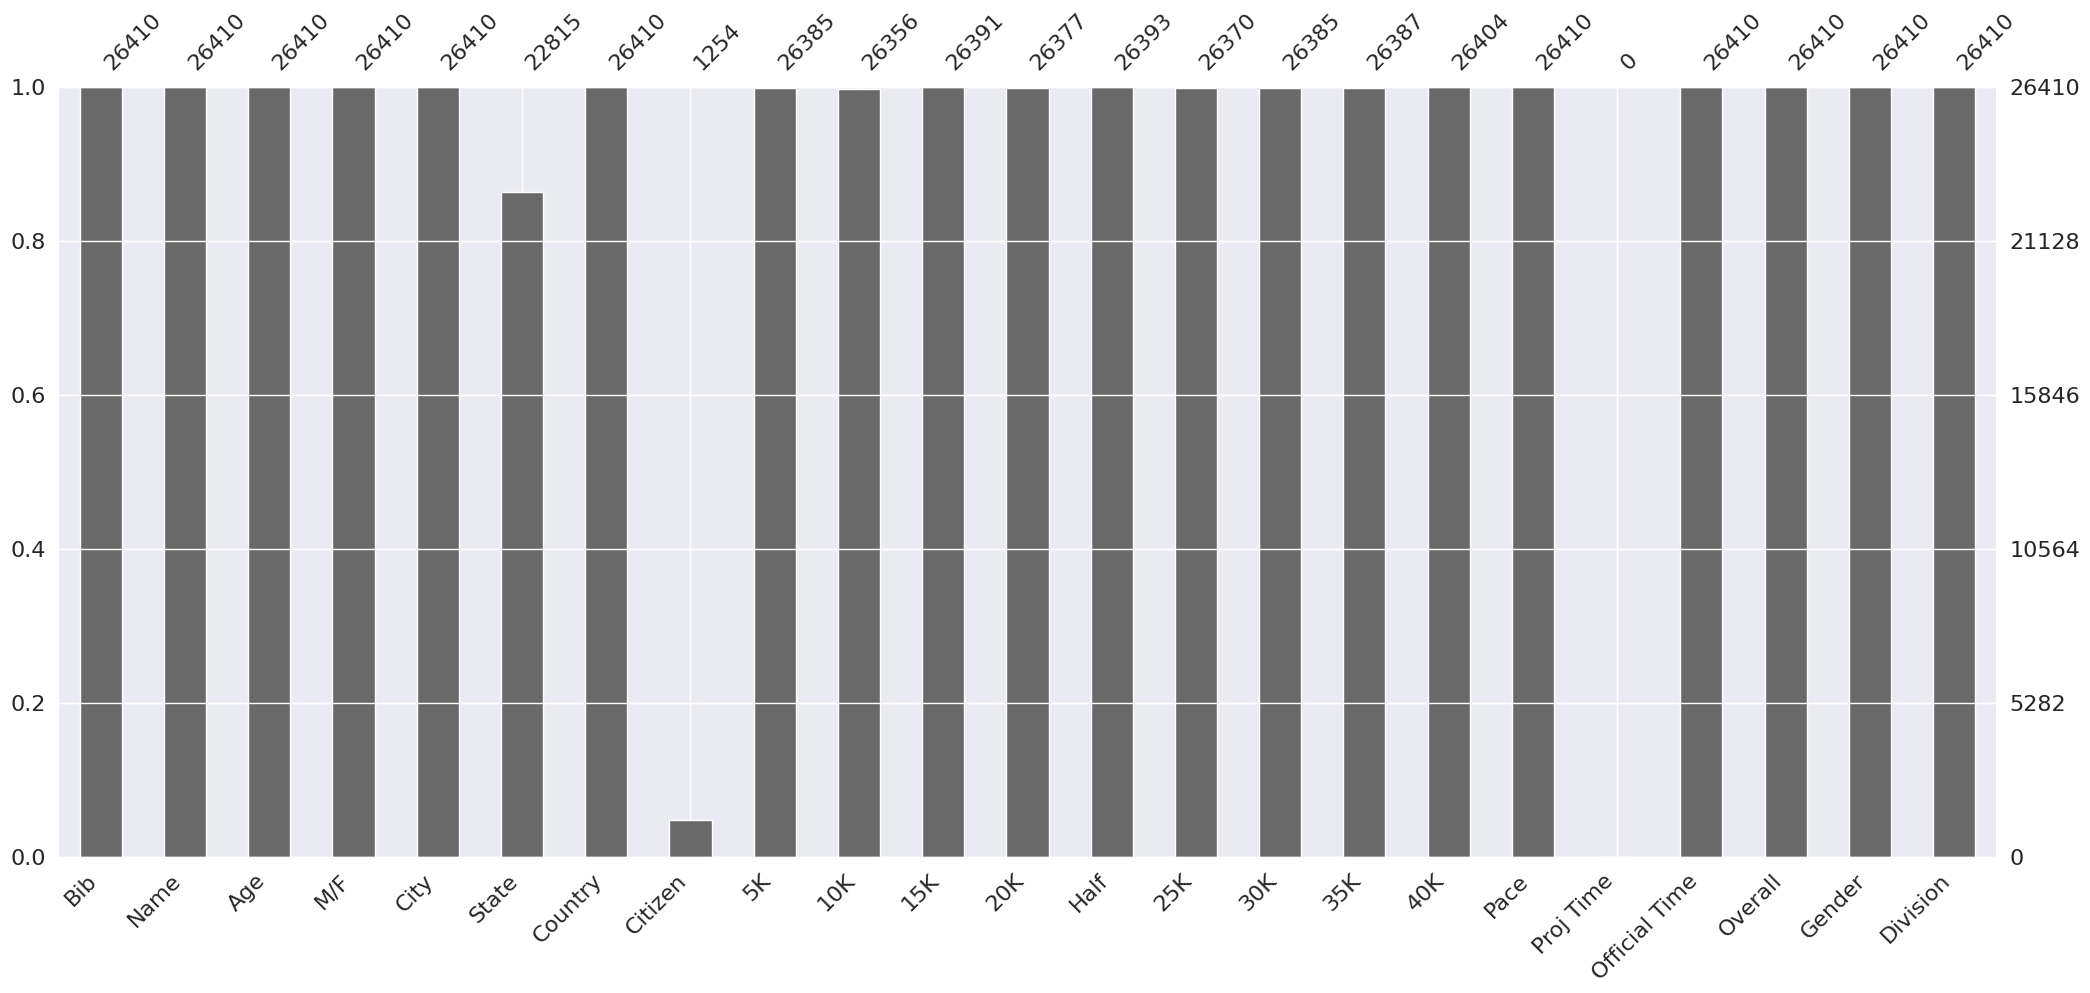

In [ ]:
msno.bar(dict_df_marathon[2017])

In [ ]:
nyear = 2017

dfTemp = pd.DataFrame(((dict_df_marathon[nyear].isnull().sum() / dict_df_marathon[nyear].shape[0]) * 100).apply("{:.4f}%".format), columns = ['Missing Percent'])
dfTemp['Missing Count'] = dict_df_marathon[nyear].isnull().sum()
dfTemp['Total Count'] = dict_df_marathon[nyear].shape[0]
print(f"{nyear} Year Missing Value-------------")
dfTemp.sort_values('Missing Count', ascending = False)

2017 Year Missing Value-------------


,Missing Percent,Missing Count,Total Count
Proj Time,100.0000%,26410,26410
Citizen,95.2518%,25156,26410
State,13.6123%,3595,26410
10K,0.2045%,54,26410
25K,0.1515%,40,26410
20K,0.1250%,33,26410
5K,0.0947%,25,26410
30K,0.0947%,25,26410
35K,0.0871%,23,26410
15K,0.0719%,19,26410


Proj Time 열은 2016년에만 채워져 있고 다른 파일에는 아예 채워져 있지 않다.   
해당 부분을 2016년 학습을 통해 채우던지 아니면 분석에서 빼는 방법도 생각할 수 있다.
   
그러기 전에 - 값을 nan값으로 변환했으니, 이 값을 제외하고 object 값을 비교하는 것을 해보자.    
Proj Time 열은 2016 년도를 제외하고는 100% nan값이 되므로 해당 열은 처음부터 제외시킨다.

In [ ]:
dict_df_marathon[2015].drop('Proj Time', axis = 1).dropna().describe(include =['O'])

,Bib,Name,M/F,City,State,Country,Citizen,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time
count,802,802,802,802,802,802,802,802,802,802,802,802,802,802,802,802,802,802
unique,802,802,2,410,51,2,79,479,604,653,695,688,709,732,735,749,270,747
top,35,"Sanca, Ruben",M,New York,MA,USA,CAN,0:23:17,0:46:18,1:08:36,1:24:09,1:41:22,2:00:10,2:23:21,2:53:07,2:41:43,0:08:05,3:06:45
freq,1,1,505,56,150,728,113,6,4,5,4,4,4,3,3,3,11,3


In [ ]:
dict_df_marathon[2016].drop('Proj Time', axis = 1).dropna().describe(include =['O'])

,Bib,Name,M/F,City,State,Country,Citizen,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time
count,863,863,863,863,863,863,863,863,863,863,863,863,863,863,863,863,863,863
unique,863,863,2,458,50,2,81,505,633,695,721,750,769,787,793,793,295,804
top,27,"Okuti, Harbert",M,New York,MA,USA,CAN,0:21:38,0:51:32,1:16:01,1:24:56,1:44:48,1:49:38,2:07:54,2:53:51,3:21:44,0:08:10,3:32:54
freq,1,1,541,59,151,767,117,7,5,4,4,4,3,4,3,4,13,4


In [ ]:
dict_df_marathon[2017].drop('Proj Time', axis = 1).dropna().describe(include =['O'])

,Bib,Name,M/F,City,State,Country,Citizen,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time
count,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930
unique,930,930,2,455,52,2,82,524,683,748,811,797,831,854,865,871,321,874
top,76,"Kisri, Rachid",M,New York,MA,USA,CAN,0:23:46,0:43:02,1:04:46,1:41:09,1:37:00,1:47:16,2:26:30,2:50:37,3:45:00,0:07:54,3:35:00
freq,1,1,602,57,156,842,118,6,5,4,3,4,4,3,4,3,11,3


직관적으로 데이터가 비슷함을 알 수 있다.   

만약 열이 이것보다 훨씬 많아서 직관적으로 알기 어려울 때는 어떻게 처리할까?   

그 때는 시각화 방법을 사용해서 오브젝트 value의 경우는 count, unique, freq 값을 서로 비교하면 될 것 같다. 수치형 value의 경우는 mean, std 값 비교하면 될 거 같다.   
다음 코드에서 이 방법을 수행해보자.

#### 시각화를 통한 비교

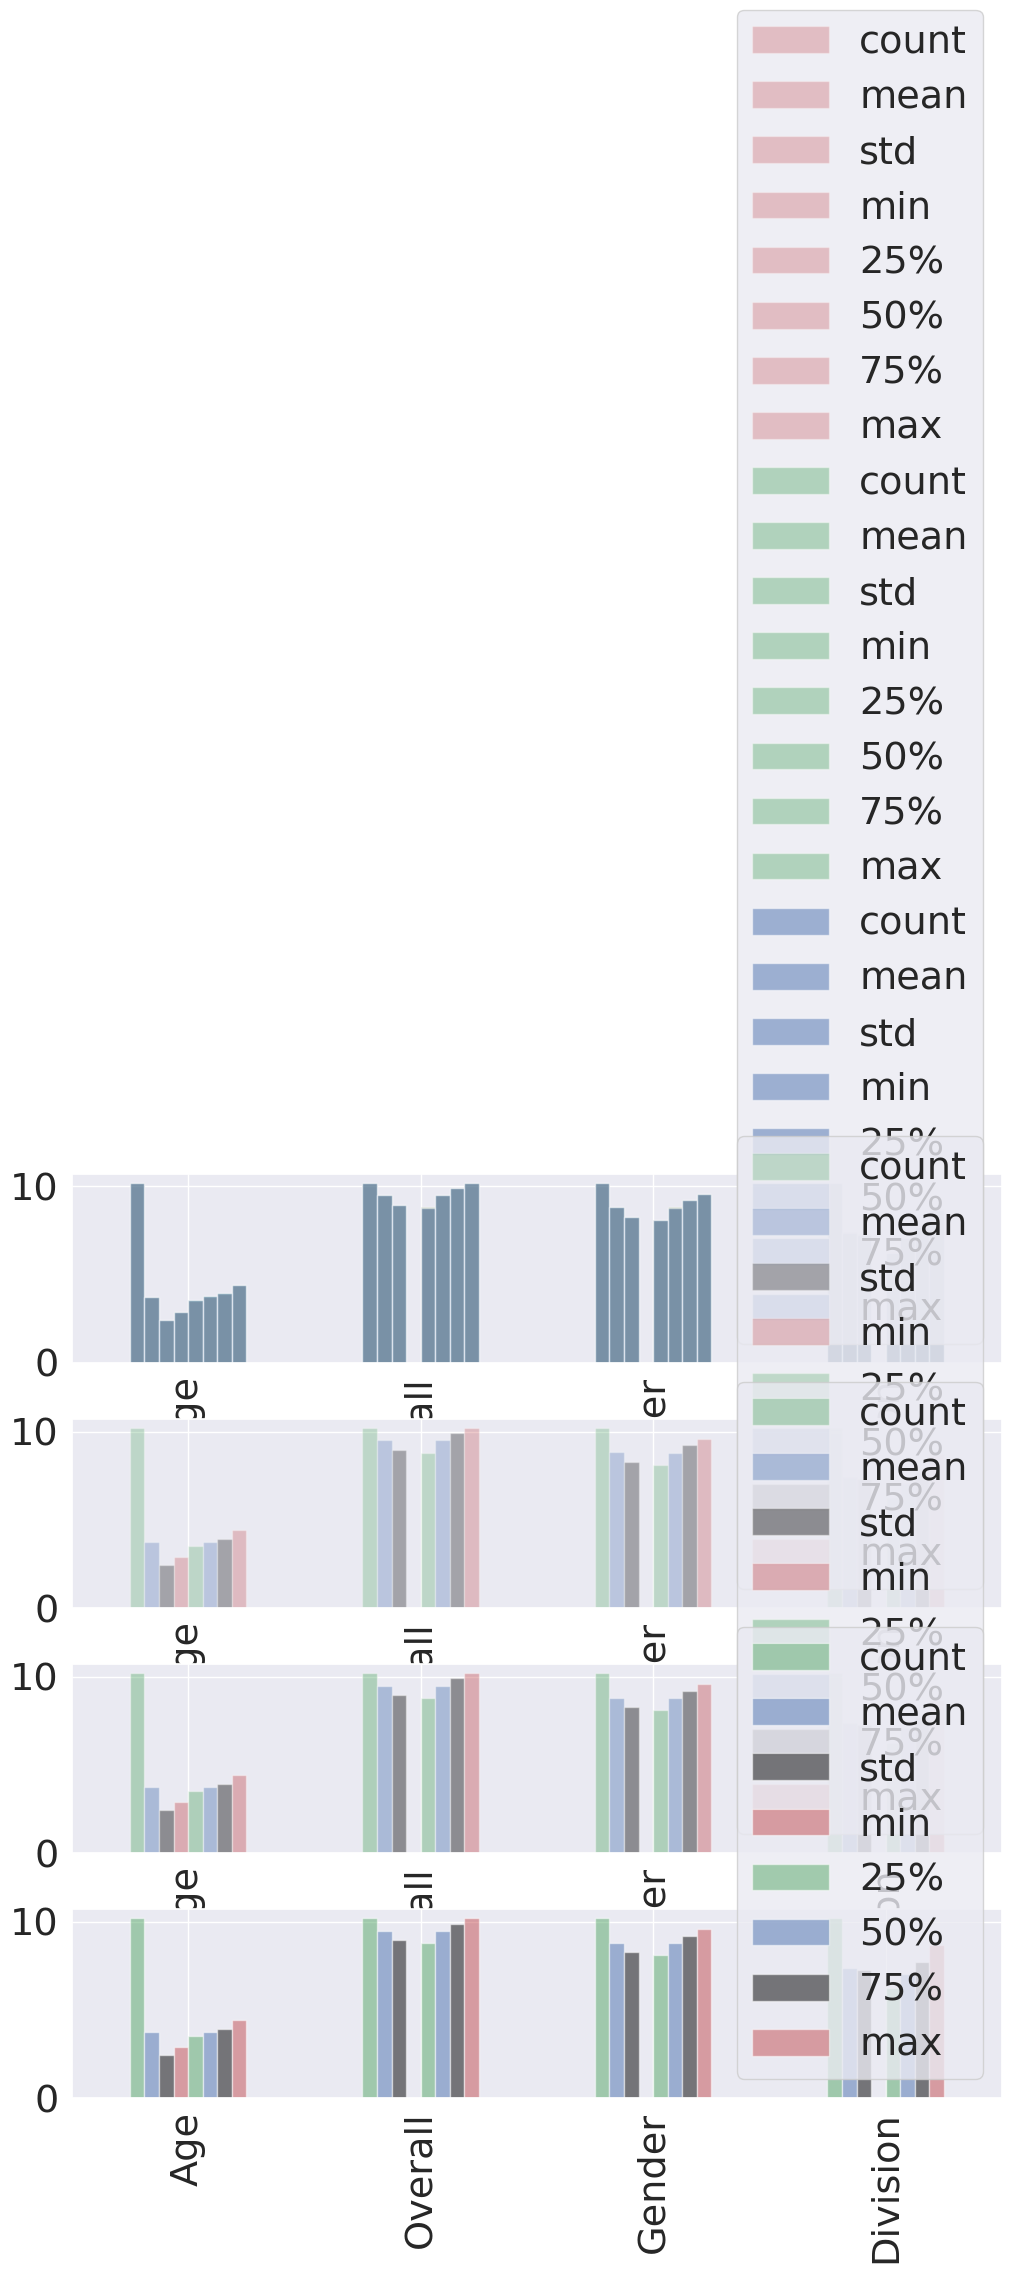

In [ ]:
data_2015 = dict_df_marathon[2015].drop('Proj Time', axis = 1).describe().T
data_2016 = dict_df_marathon[2016].drop('Proj Time', axis = 1).describe().T
data_2017 = dict_df_marathon[2017].drop('Proj Time', axis = 1).describe().T

fig, axes = plt.subplots(4, 1, figsize=(12, 12))

# 크기 비율만 비교하면 되므로 데이터 간 간격을 log를 통한 정규화

data_2015.apply(np.log).plot.bar(alpha = 0.3, color = {'r', 'r', 'r', 'r'},ax = axes[0])
data_2016.apply(np.log).plot.bar(alpha = 0.4, color = {'g', 'g', 'g', 'g'}, ax = axes[0])
data_2017.apply(np.log).plot.bar(alpha = 0.5, color = {'b', 'b', 'b', 'b'},ax = axes[0])

data_2015.apply(np.log).plot.bar(alpha = 0.3, color = {'r', 'g', 'b', 'black'},ax = axes[1])
data_2016.apply(np.log).plot.bar(alpha = 0.4, color = {'r', 'g', 'b', 'black'}, ax = axes[2])
data_2017.apply(np.log).plot.bar(alpha = 0.5, color = {'r', 'g', 'b', 'black'},ax = axes[3])

plt.subplots_adjust(hspace=0.3)

수치형 데이터는 거의 같음을 알 수 있다.

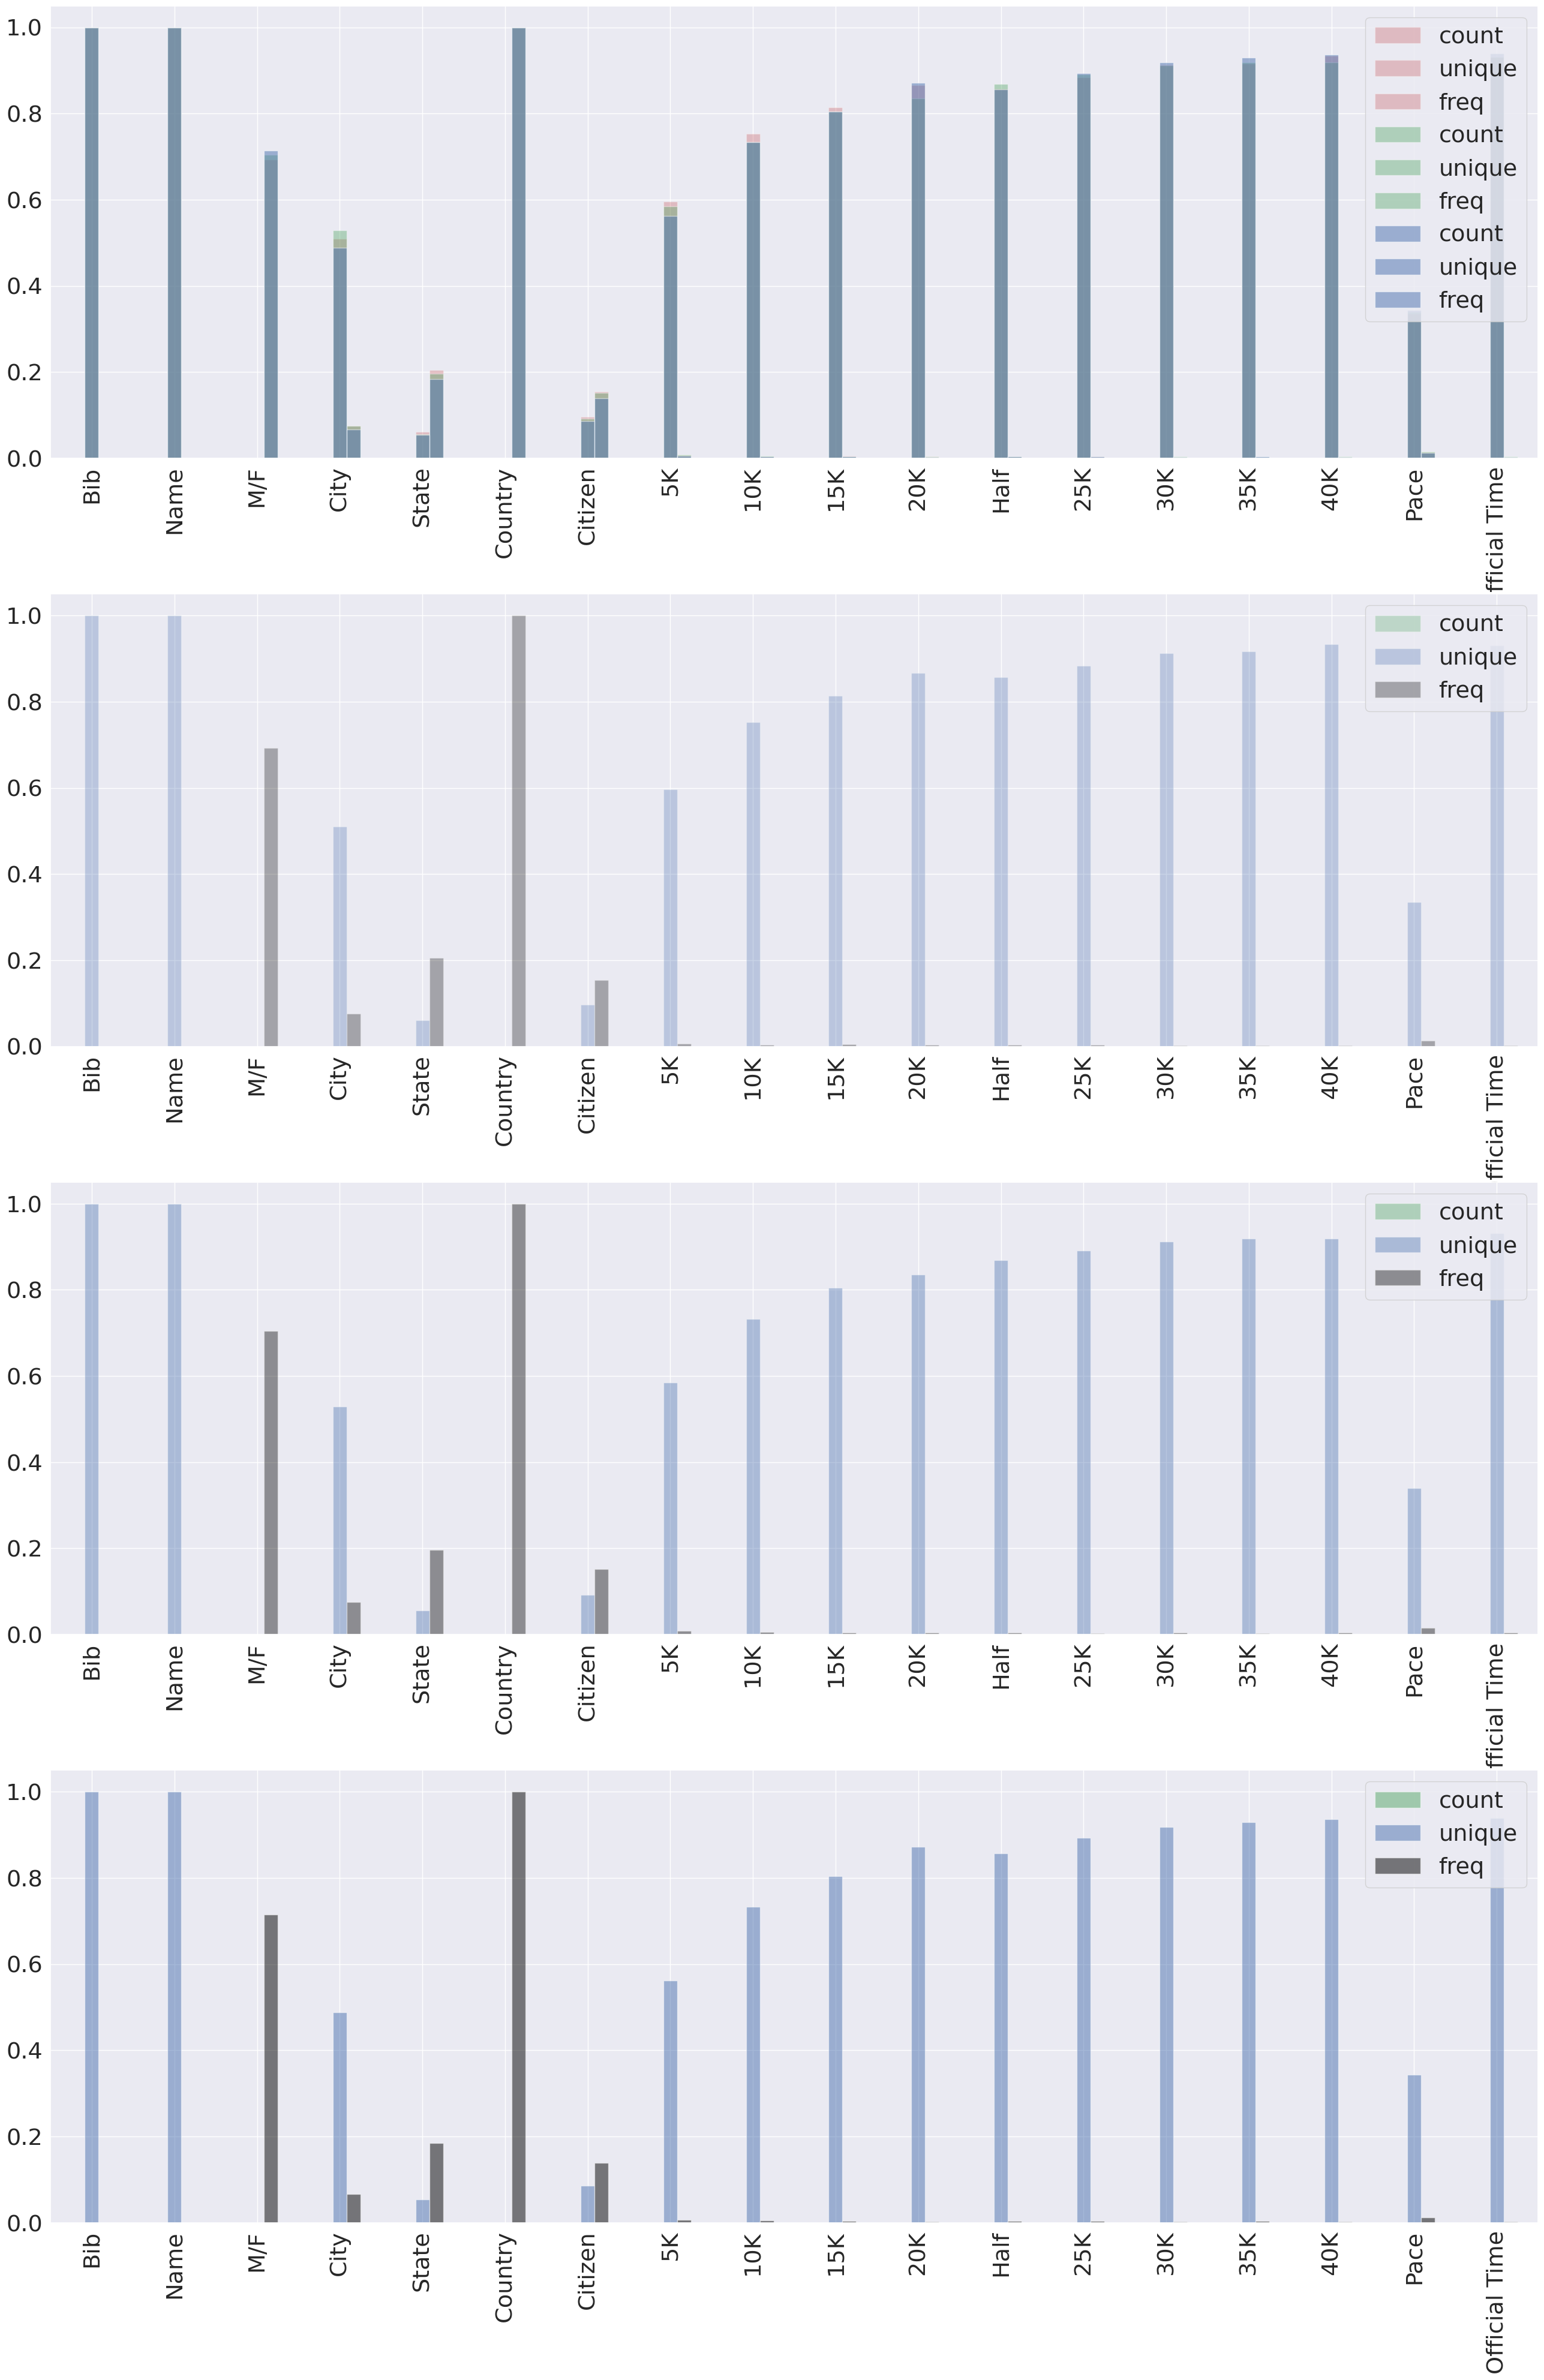

In [ ]:
# int 값을 가질 경우 log 방법이 되지 않기 때문에 자료형을 바꾸거나 다른 스케일링 방법을 정해야 한다.
# 여기서는 MinMaxScaler 방법을 이용한다. 이유는 log는 값이 1보다 작은 경우 문제가 발생할 소지가 있기 때문이다

from sklearn.preprocessing import MinMaxScaler

data_2015 = dict_df_marathon[2015].drop('Proj Time', axis = 1).dropna().describe(include =['O']).T.drop('top', axis=1)
data_2016 = dict_df_marathon[2016].drop('Proj Time', axis = 1).dropna().describe(include =['O']).T.drop('top', axis=1)
data_2017 = dict_df_marathon[2017].drop('Proj Time', axis = 1).dropna().describe(include =['O']).T.drop('top', axis=1)


def normalize_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit(data)
    return scaler.transform(data)


fig, axes = plt.subplots(4, 1, figsize=(32, 48))
data_2015 = pd.DataFrame(normalize_data(data_2015),index = data_2015.index, columns = data_2015.columns)
data_2016 = pd.DataFrame(normalize_data(data_2016),index = data_2016.index, columns = data_2016.columns)
data_2017 = pd.DataFrame(normalize_data(data_2017),index = data_2017.index, columns = data_2017.columns)

data_2015.plot.bar(alpha = 0.3, color = {'r', 'r', 'r', 'r'},ax = axes[0])
data_2016.plot.bar(alpha = 0.4, color = {'g', 'g', 'g', 'g'}, ax = axes[0])
data_2017.plot.bar(alpha = 0.5, color = {'b', 'b', 'b', 'b'},ax = axes[0])

data_2015.plot.bar(alpha = 0.3, color = {'r', 'g', 'b', 'black'},ax = axes[1])
data_2016.plot.bar(alpha = 0.4, color = {'r', 'g', 'b', 'black'}, ax = axes[2])
data_2017.plot.bar(alpha = 0.5, color = {'r', 'g', 'b', 'black'},ax = axes[3])

plt.subplots_adjust(hspace=0.3)

오브젝트 데이터도 비슷함을 알 수 있다.   
결론적으로 모든 파일이 Proj Time 열을 제외하고는 모든 열이 비슷한 형태를 띔을 알게 되었다.

### Nan 값 처리
이제 Nan값을 처리할 방법을 고민해야 된다.

처리 방법은 다음과 같다.
1. 전체 평균 또는 최빈 값으로 처리한다.
2. 특정 그룹으로 묶은 후 특정 그룹의 평균 또는 최빈 값으로 처리한다.
3. 예측 모델을 만들어 그 모델의 예측 값으로 처리한다.
4. Nan 값을 너무 많이 가지는 열을 삭제한다.

In [ ]:
nyear = 2017

dfTemp = pd.DataFrame(((dict_df_marathon[nyear].isnull().sum() / dict_df_marathon[nyear].shape[0]) * 100).apply("{:.4f}%".format), columns = ['Missing Percent'])
dfTemp['Missing Count'] = dict_df_marathon[nyear].isnull().sum()
dfTemp['Total Count'] = dict_df_marathon[nyear].shape[0]
print(f"{nyear} Year Missing Value-------------")
dfTemp.sort_values('Missing Count', ascending = False)

2017 Year Missing Value-------------


,Missing Percent,Missing Count,Total Count
Proj Time,100.0000%,26410,26410
Citizen,95.2518%,25156,26410
State,13.6123%,3595,26410
10K,0.2045%,54,26410
25K,0.1515%,40,26410
20K,0.1250%,33,26410
5K,0.0947%,25,26410
30K,0.0947%,25,26410
35K,0.0871%,23,26410
15K,0.0719%,19,26410


2017년의 데이터를 가지고 어떻게 처리할 지 고민해보자.   

Proj time 특성은 2015년 2017년 데이터가 전부 없고 2016년 데이터만 있으므로 33%정도의 데이터만 존재한다. 데이터가 많은 편이 아니므로 먼저 다른 특성과 상관관계를 분석해보고 특별히 상관관계가 뛰어난 특성이 존재하여 예측이 가능할 것 같다는 확신이 들지 않는다면 삭제하기로 한다.   
   
Citizen 특성은 모든 파일에서 5% 정도의 데이터만 존재한다. 따라서 제거한다.   

나머지 Nan값을 갖는 특성은 연속형 데이터의 경우 회귀 모델을 통한 예측과 각 그룹에 따른 평균 값 2가지 방향으로 진행해보고, 카테고리형 데이터의 경우 분류 모델을 통한 예측과 각 그룹에 대한 최빈 값 2가지 방향으로 진행해보는 것으로 해보려고 한다.   

하지만 약 10 가지 특성정도가 Nan 값을 포함하고 있으므로 각각 다르게 처리한다면 총 10! = 3628800 가지의 데이터를 채우는 방법이 존재한다. 이렇게 처리한다면 3628800번 해당 데이터를 채우는 모델을 만들고 해당 모델을 가지고 3628880번 모델을 학습해보고 해당 모델 중 한가지를 선택해야 된다. 이렇게 하면 모델 하나의 평가가 끝난거고 다른 모델을 또 평가해야하는데, 생각만해도 너무 비효율적일 것 같다. 따라서 간단하게 10% 미만의 Nan 값을 지닌 특성들은 평균 또는 최빈값으로 처리하고, 10% 이상 Nan 값을 지닌 특성들은 예측을 해보는 것으로 해본다.

#### 데이터 형식 변경
시간을 수치로 환산한다.   
ex) 1:10:56 => 4256

In [ ]:
import re

def functest(x):
  if(pd.isna(x)):
    return np.nan

  pattern = r'(\d{1,2}):(\d{1,2}):(\d{1,2})'
  patternmatch = re.match(pattern, str(x))

  if patternmatch != None:
    hours = int(patternmatch.group(1))
    minutes = int(patternmatch.group(2))
    seconds = int(patternmatch.group(3))
    return hours * 60 * 60 + minutes * 60 + seconds
  else:
    return x

dict_df_marathon[2015] = dict_df_marathon[2015].applymap(functest)
dict_df_marathon[2016] = dict_df_marathon[2016].applymap(functest)
dict_df_marathon[2017] = dict_df_marathon[2017].applymap(functest)

In [ ]:
dict_df_marathon[2015].head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,883.0,1783.0,...,4567.0,5520.0,6479.0,7359.0,296,NaN,7757,1,1,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,883.0,1783.0,...,4567.0,5519.0,6479.0,7362.0,298,NaN,7788,2,2,2
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,883.0,1783.0,...,4567.0,5520.0,6479.0,7381.0,299,NaN,7822,3,3,3
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,883.0,1784.0,...,4567.0,5520.0,6483.0,7427.0,300,NaN,7847,4,4,4
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,883.0,1784.0,...,4567.0,5520.0,6479.0,7407.0,300,NaN,7849,5,5,5


#### 상관관계 분석

<ipython-input-242-0ce6a7fdd9d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dict_df_marathon[2016].corr(), annot = True, cmap = 'binary')


<Axes: >

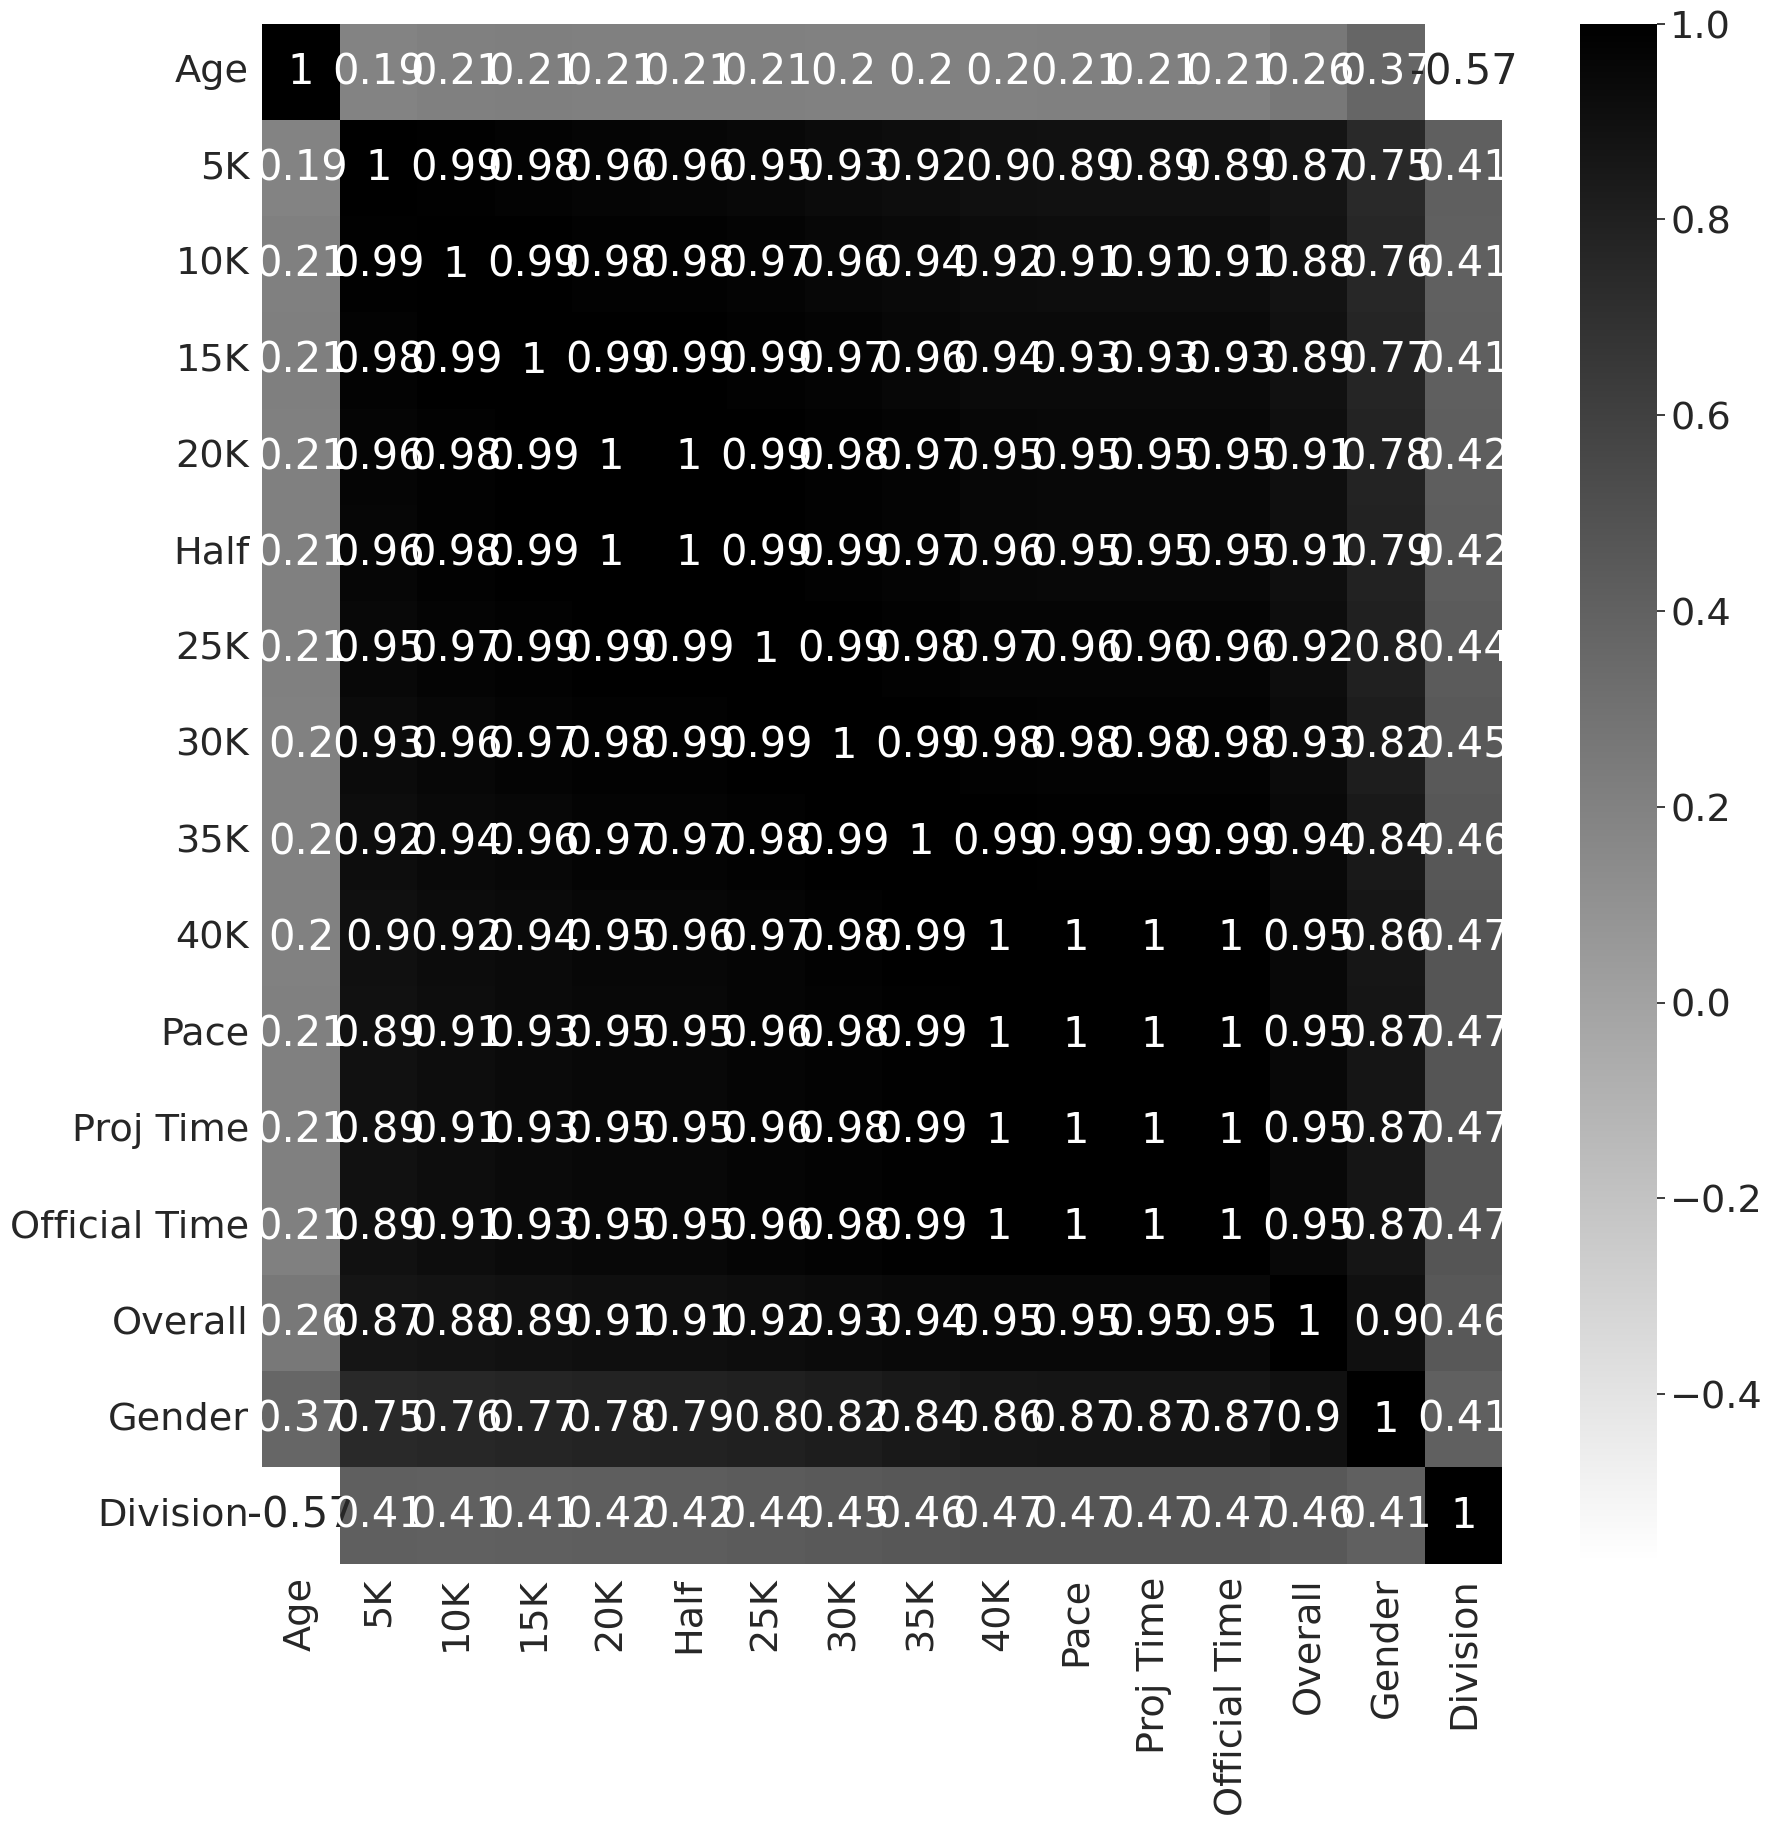

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(dict_df_marathon[2016].corr(), annot = True, cmap = 'binary')

In [ ]:
df_marathon_2015_to2017 = pd.concat([dict_df_marathon[2015], dict_df_marathon[2016], dict_df_marathon[2017]], ignore_index=True)

<ipython-input-244-263e5441745e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_marathon_2015_to2017.corr(), annot = True, cmap = 'binary')


<Axes: >

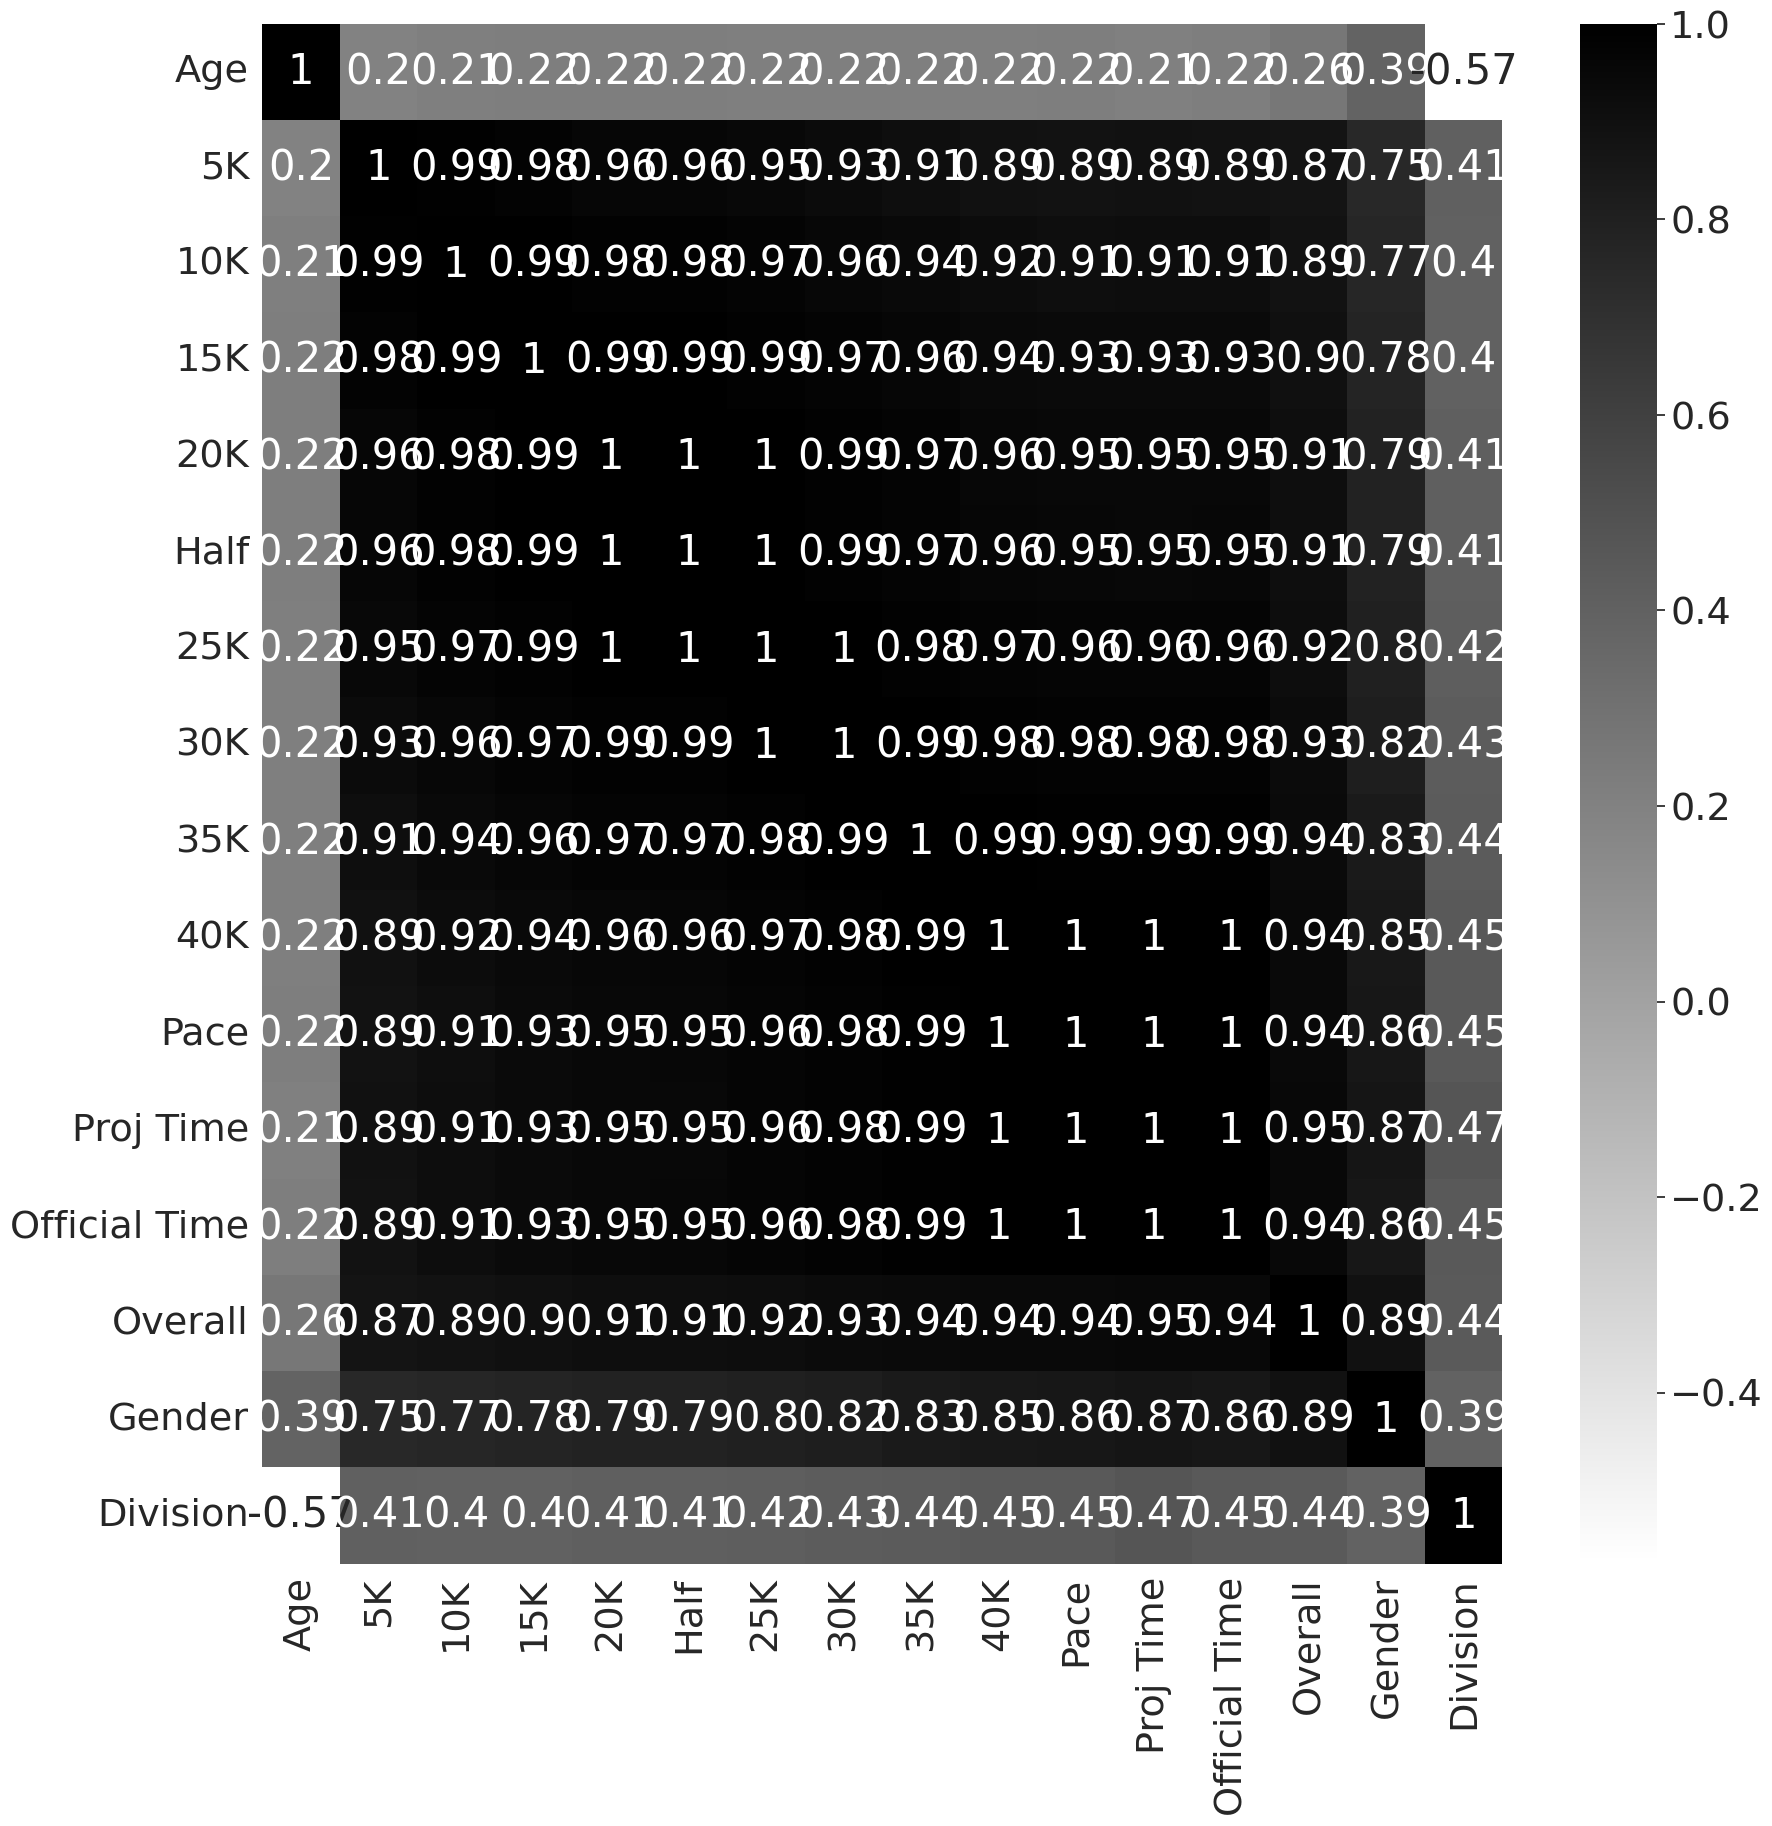

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_marathon_2015_to2017.corr(), annot = True, cmap = 'binary')

Pace와 OfficialTime, 40K는 Proj Time과 1이라는 매우 매우 높은 상관관계를 가지고 있다. 따라서 굳이 Proj Time을 버릴 필요 없이 예측해도 될거 같다.   

상관관계 분석을 해본 소감으로 솔직히 Age와 Division 외의 모든 컬럼이 너무 연관관계가 높기 때문에 이중에 하나의 컬럼만 남겨도 되겠다는 생각이 든다.   


#### 회귀를 통한 Proj Time 결측치 채우기

Pace와 OfficialTime, 40K가 1이라는 상관관계를 가지고 있으므로 굳이 위험성을 지닐 필요 없이 이 컬럼으로만 회귀 모델을 만들자.   
그리고 40K는 결측치가 있으므로 Pace와 OfficialTime만 사용한다.

In [ ]:
from operator import index
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_marathon_2015_to2017[['Pace', 'Official Time']]
y = df_marathon_2015_to2017['Proj Time']

X = X[y.notnull()].reset_index(drop = True)
y = y.dropna().reset_index(drop = True)

In [ ]:
X.head()

,Pace,Official Time
0,304,7965
1,306,8012
2,307,8042
3,307,8045
4,311,8145


In [ ]:
y.head()

0    7965.0
1    8012.0
2    8042.0
3    8045.0
4    8145.0
Name: Proj Time, dtype: float64

In [ ]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.9999971865204291

In [ ]:
model.score(X_test, y_test)

0.9999991964541014

99.999% 확률로 정답을 맞추는 모델을 만들었다.

In [ ]:
dict_df_marathon[2015]['Proj Time'] = model.predict(dict_df_marathon[2015][['Pace', 'Official Time']])
dict_df_marathon[2017]['Proj Time'] = model.predict(dict_df_marathon[2017][['Pace', 'Official Time']])
df_marathon_2015_to2017['Proj Time'] = model.predict(df_marathon_2015_to2017[['Pace', 'Official Time']])

In [ ]:
dict_df_marathon[2015].head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,883.0,1783.0,...,4567.0,5520.0,6479.0,7359.0,296,7753.788357,7757,1,1,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,883.0,1783.0,...,4567.0,5519.0,6479.0,7362.0,298,7791.080825,7788,2,2,2
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,883.0,1783.0,...,4567.0,5520.0,6479.0,7381.0,299,7822.800697,7822,3,3,3
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,883.0,1784.0,...,4567.0,5520.0,6483.0,7427.0,300,7848.160421,7847,4,4,4
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,883.0,1784.0,...,4567.0,5520.0,6479.0,7407.0,300,7849.573787,7849,5,5,5


In [ ]:
dict_df_marathon[2017].head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,925.0,1828.0,...,4619.0,5581.0,6499.0,7373.0,297,7775.614665,7777,1,1,1
1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,924.0,1827.0,...,4619.0,5581.0,6499.0,7394.0,298,7798.147656,7798,2,2,2
2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,925.0,1829.0,...,4620.0,5581.0,6511.0,7418.0,299,7827.040796,7828,3,3,3
3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,925.0,1829.0,...,4620.0,5581.0,6538.0,7475.0,303,7928.479692,7928,4,4,4
4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,925.0,1828.0,...,4619.0,5581.0,6521.0,7500.0,304,7955.252782,7955,5,5,5


#### 평균을 이용한 5K, 10K, 15K, 20K, 25K, 30K, 35K, 40K, half 열 채우기

다른 특성은 상관 없어도 남녀 특성은 상관이 있을 것 같다 이를 확인해보자

<ipython-input-254-40fff2b0dbea>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  na_df_marathon.groupby(['M/F']).mean().T.plot.bar()


<Axes: >

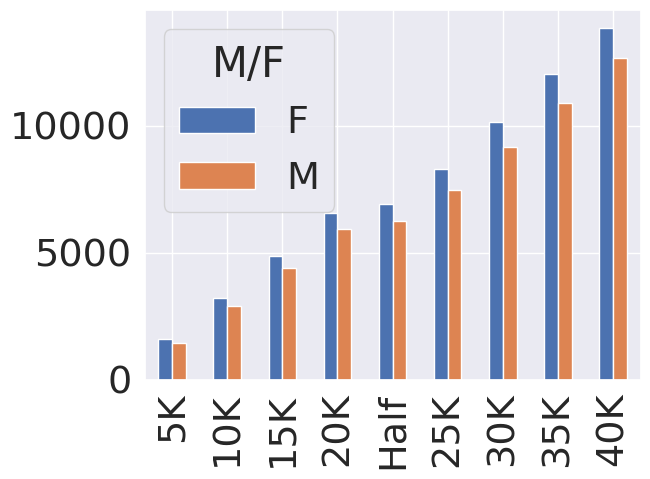

In [ ]:
nan_gendercolumn = df_marathon_2015_to2017.isnull().any()
nan_gendercolumn['M/F'] = True

na_df_marathon = df_marathon_2015_to2017.loc[:, nan_gendercolumn]
na_df_marathon.groupby(['M/F']).mean().T.plot.bar()

정규화를 통해서 더 정확히 봐보자

<ipython-input-255-1057a6f20336>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  na_df_marathon.groupby(['M/F']).mean().apply(np.log).T.plot.bar()


<Axes: >

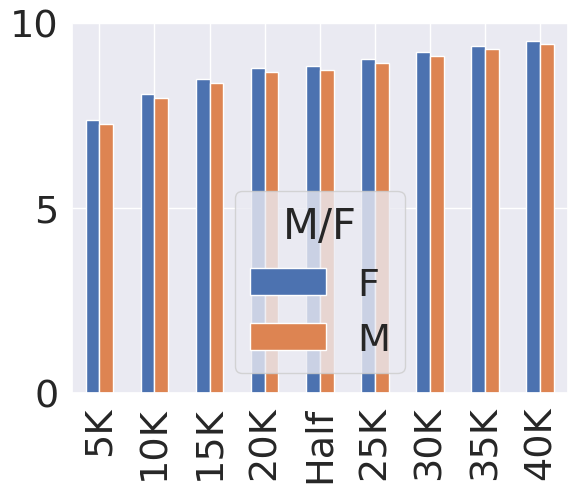

In [ ]:
nan_gendercolumn = df_marathon_2015_to2017.isnull().any()
nan_gendercolumn['M/F'] = True

na_df_marathon = df_marathon_2015_to2017.loc[:, nan_gendercolumn]
na_df_marathon.groupby(['M/F']).mean().apply(np.log).T.plot.bar()

위의 그래프를 통해 성별에 따른 시간 차이가 있음을 확인할 수 있다

이것을 보고 혹시 다른 컬럼에 따라서도 시간 차이가 발생할 수 있을 지 궁금해졋다.

<Axes: ylabel='Country'>

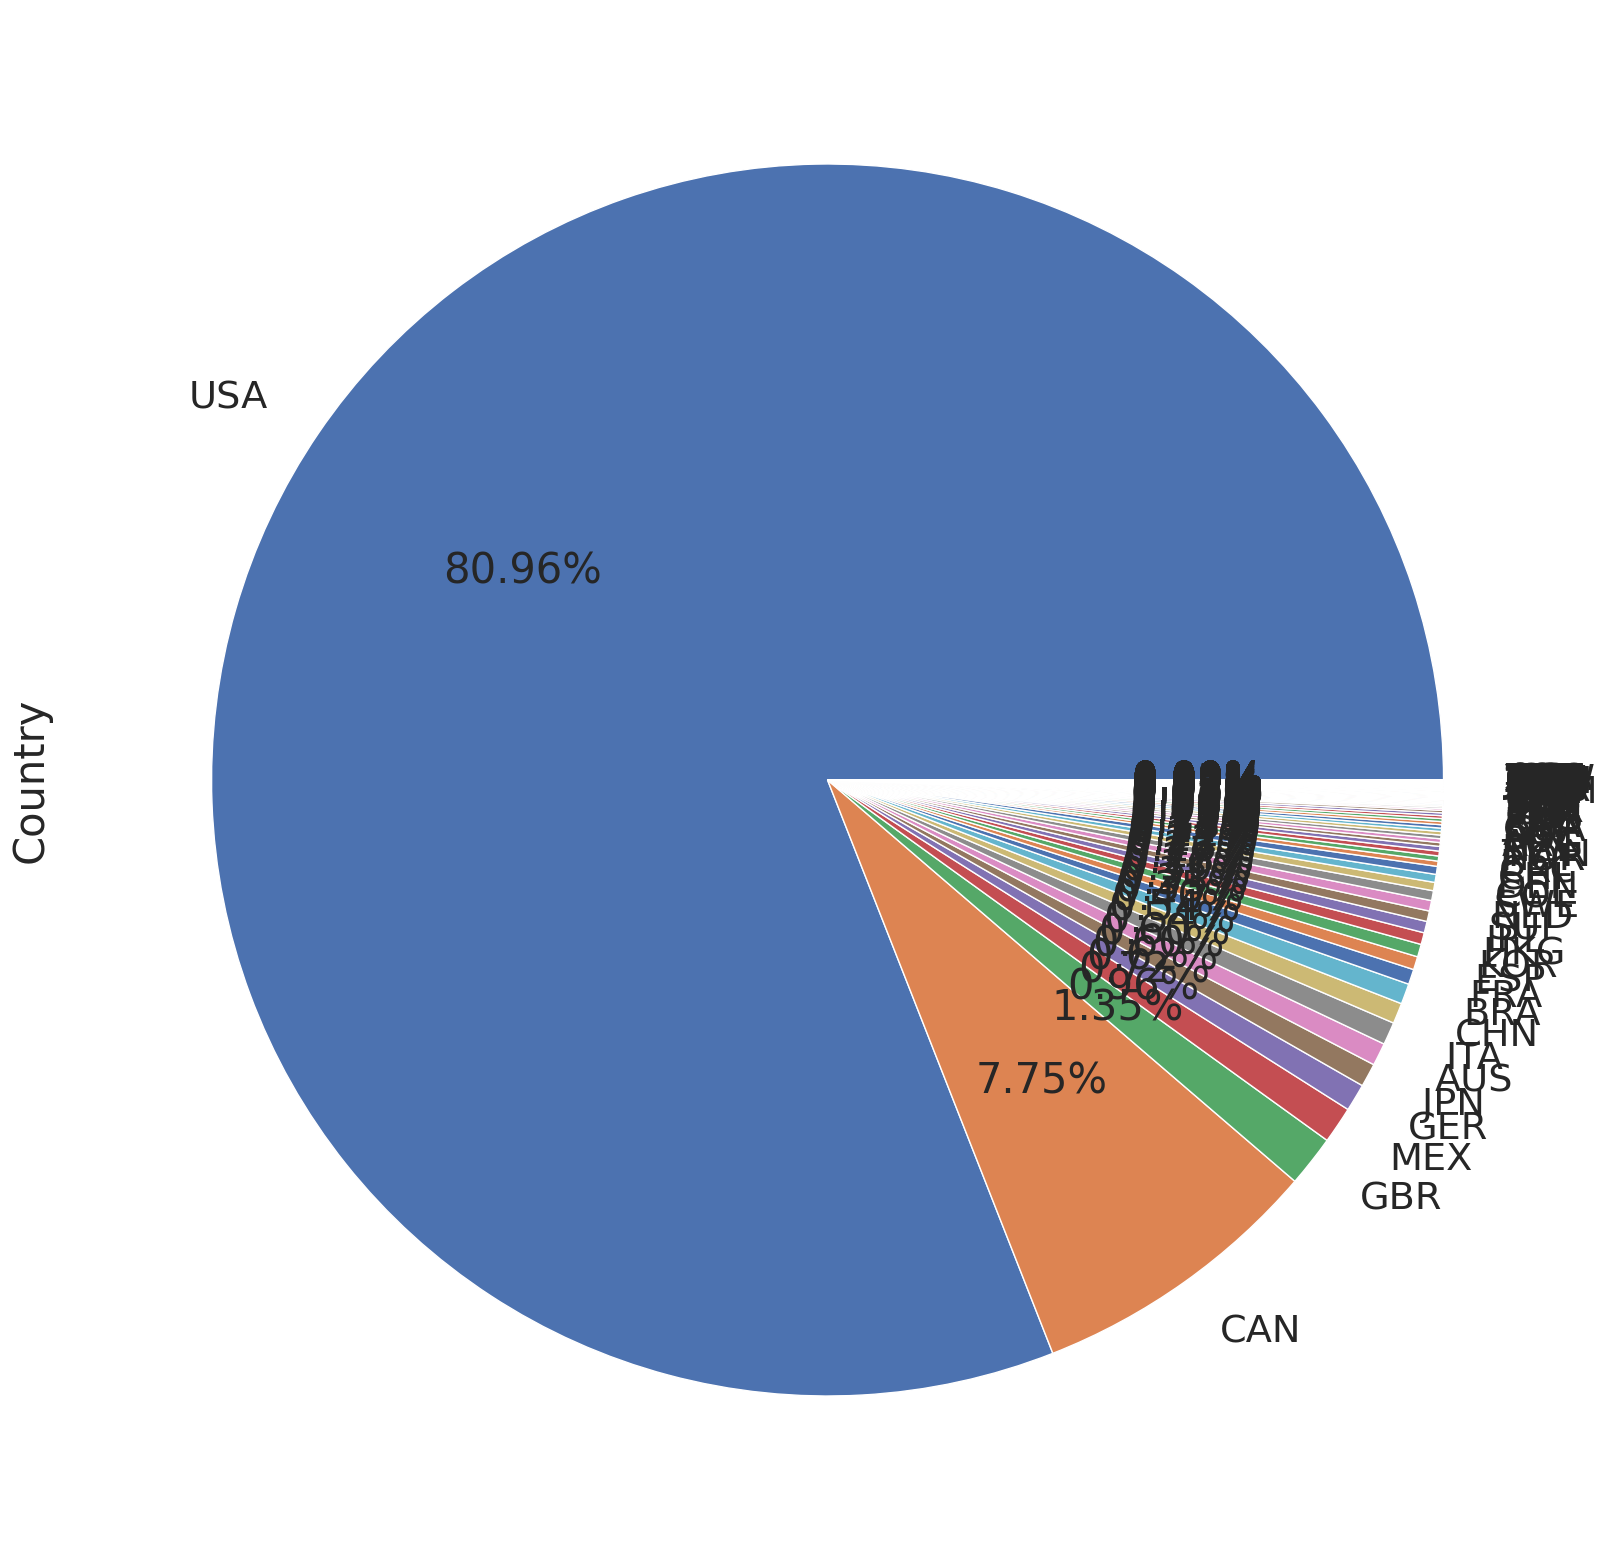

In [ ]:
nan_countrycolumn = df_marathon_2015_to2017.isnull().any()
nan_countrycolumn['Country'] = True

na_df_marathon = df_marathon_2015_to2017.loc[:, nan_countrycolumn]
sns.set(font_scale=2.5)
plt.figure(figsize=(20, 20))
na_df_marathon['Country'].value_counts().plot.pie(autopct = '%.2f%%')



확인 결과 USA와 CAN이 비율을 많이 차지하므로 나머지 국가는 Other로 묶기로 한다

In [ ]:
countrylist = na_df_marathon['Country'].unique()

countrylist = np.delete(countrylist, np.where(countrylist == 'USA'))
countrylist = np.delete(countrylist, np.where(countrylist == 'CAN'))

countrylist, countrylist.shape

(array(['ETH', 'KEN', 'UKR', 'RSA', 'ITA', 'RUS', 'JPN', 'BEL', 'NZL',
        'BLR', 'AUS', 'GBR', 'CRO', 'ECU', 'GER', 'ESP', 'SWE', 'BRA',
        'HKG', 'MEX', 'DEN', 'MAS', 'IRL', 'ISL', 'CHI', 'GUA', 'FIN',
        'SVK', 'COL', 'SUI', 'CHN', 'AUT', 'NED', 'FRA', 'CRC', 'CYP',
        'POL', 'NOR', 'KOR', 'POR', 'TPE', 'PER', 'SIN', 'PAN', 'VEN',
        'LUX', 'CZE', 'VIE', 'MAR', 'BER', 'ROU', 'IND', 'LIE', 'ARG',
        'ESA', 'DOM', 'ISR', 'GRE', 'SLO', 'LTU', 'URU', 'CAY', 'EST',
        'JAM', 'UAE', 'VGB', 'TUR', 'LAT', 'AND', 'OMA', 'BAH', 'TRI',
        'INA', 'AHO', 'PHI', 'UGA', 'QAT', 'ZIM', 'TWN', 'HON', 'FLK',
        'HUN', 'JOR', 'ALB', 'SRB', 'PAK', 'BRN', 'BDI', 'EGY', 'THA',
        'MLT', 'KSA', 'SMR', 'BUL', 'ALG', 'NCA', 'BAR', 'GRN', 'PAR',
        'TCA', 'KUW', 'MGL', 'NGR'], dtype=object),
 (103,))

In [ ]:
countryother = np.full_like(countrylist, 'Other')

countryother, countryother.shape

(array(['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
      

In [ ]:
na_df_marathon['Country'].replace(countrylist, countryother, inplace = True)

<ipython-input-259-db6b7d887049>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_df_marathon['Country'].replace(countrylist, countryother, inplace = True)


<Axes: ylabel='Country'>

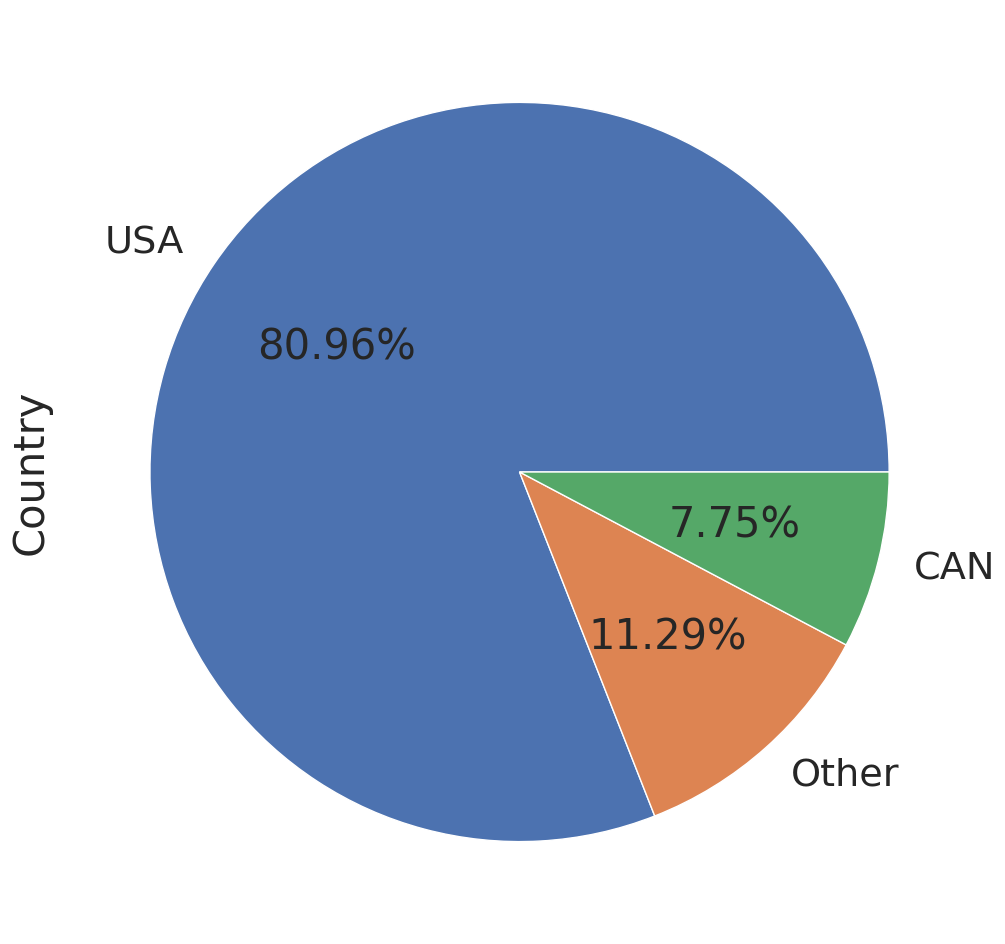

In [ ]:
sns.set(font_scale=2.5)
plt.figure(figsize=(12, 12))
na_df_marathon['Country'].value_counts().plot.pie(autopct = '%.2f%%')


<ipython-input-261-32229f811db8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  na_df_marathon.groupby(['Country']).mean().T.plot.bar()


<Axes: >

<Figure size 2000x2000 with 0 Axes>

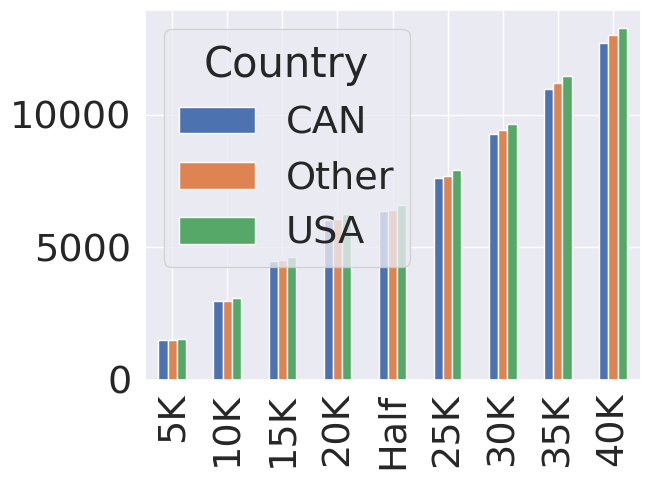

In [ ]:
plt.figure(figsize=(20, 20))
na_df_marathon.groupby(['Country']).mean().T.plot.bar()

y값이 차이가 나보인다 하지만 정규화를 통해서 더 정확히보자

<ipython-input-262-289b9ca5bdbc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  na_df_marathon.groupby(['Country']).mean().apply(np.log).T.plot.bar()


<Axes: >

<Figure size 2000x2000 with 0 Axes>

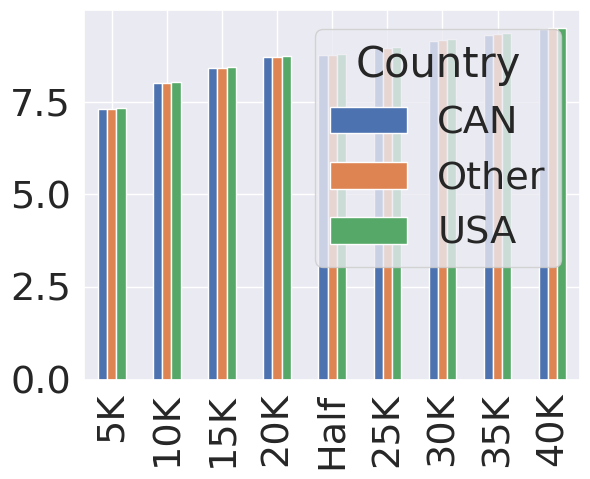

In [ ]:
plt.figure(figsize=(20, 20))
na_df_marathon.groupby(['Country']).mean().apply(np.log).T.plot.bar()

딱히 별 차이가 없어보인다.

따라서 성별에 따라서만 평균을 통해 넣기로 한다

In [ ]:
nan_gendercolumn = df_marathon_2015_to2017.isnull().any()
nan_gendercolumn['M/F'] = True

na_df_marathon = df_marathon_2015_to2017.loc[:, nan_gendercolumn]
na_df_marathon.groupby(['M/F']).mean()

<ipython-input-266-7363c84933c0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  na_df_marathon.groupby(['M/F']).mean()


,5K,10K,15K,20K,Half,25K,30K,35K,40K
M/F,,,,,,,,,
F,1609.603555,3225.591017,4871.869036,6571.025250,6935.642517,8309.394749,10136.203229,12024.416387,13871.573093
M,1459.011672,2914.923681,4392.347555,5916.211194,6246.322318,7481.932724,9145.584743,10898.735767,12662.504869


In [ ]:
dict_df_marathon[2015].loc[dict_df_marathon[2015][na_df_marathon.mean().index].isna().any(axis=1), na_df_marathon.mean().index]

<ipython-input-267-fa683ab7e66a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dict_df_marathon[2015].loc[dict_df_marathon[2015][na_df_marathon.mean().index].isna().any(axis=1), na_df_marathon.mean().index]
<ipython-input-267-fa683ab7e66a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dict_df_marathon[2015].loc[dict_df_marathon[2015][na_df_marathon.mean().index].isna().any(axis=1), na_df_marathon.mean().index]


,5K,10K,15K,20K,Half,25K,30K,35K,40K
510,1120.0,2252.0,3401.0,4569.0,4821.0,NaN,6927.0,8168.0,9373.0
1221,1069.0,2128.0,3189.0,4267.0,4502.0,5346.0,6479.0,8079.0,NaN
2021,1195.0,2389.0,3607.0,4841.0,5105.0,6088.0,7395.0,8732.0,NaN
2327,NaN,2520.0,3782.0,5046.0,5319.0,6310.0,7615.0,8936.0,10186.0
2787,1312.0,2576.0,3811.0,5048.0,5323.0,6311.0,7621.0,8951.0,NaN
...,...,...,...,...,...,...,...,...,...
26546,NaN,4499.0,6866.0,9354.0,9927.0,12043.0,14686.0,17493.0,20472.0
26557,NaN,4793.0,7275.0,9822.0,10384.0,12447.0,15199.0,17879.0,20639.0
26559,1698.0,3969.0,6551.0,9114.0,9697.0,11811.0,14635.0,17443.0,NaN
26561,2060.0,4298.0,6812.0,9438.0,9992.0,12083.0,14834.0,17696.0,NaN


In [ ]:
dict_df_marathon[2015].loc[dict_df_marathon[2015]['M/F'] == 'M', na_df_marathon.mean().index].fillna(na_df_marathon.groupby('M/F').mean().loc['M'])
dict_df_marathon[2015].loc[dict_df_marathon[2015]['M/F'] == 'F', na_df_marathon.mean().index].fillna(na_df_marathon.groupby('M/F').mean().loc['F'])


<ipython-input-271-52b5b5636010>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dict_df_marathon[2015].loc[dict_df_marathon[2015]['M/F'] == 'M', na_df_marathon.mean().index].fillna(na_df_marathon.groupby('M/F').mean().loc['M'])
<ipython-input-271-52b5b5636010>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dict_df_marathon[2015].loc[dict_df_marathon[2015]['M/F'] == 'M', na_df_marathon.mean().index].fillna(na_df_marathon.groupby('M/F').mean().loc['M'])
<ipython-input-271-52b5b5636010>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecate

,5K,10K,15K,20K,Half,25K,30K,35K,40K
30,1019.0,2064.0,3109.0,4140.0,4365.0,5168.0,6204.0,7250.0,8250.0
31,1018.0,2063.0,3108.0,4140.0,4365.0,5168.0,6203.0,7250.0,8250.0
33,1017.0,2063.0,3109.0,4141.0,4365.0,5169.0,6204.0,7250.0,8250.0
39,1020.0,2064.0,3108.0,4140.0,4365.0,5168.0,6203.0,7249.0,8271.0
43,1019.0,2064.0,3109.0,4141.0,4366.0,5169.0,6204.0,7250.0,8282.0
...,...,...,...,...,...,...,...,...,...
26583,2013.0,4050.0,6182.0,9121.0,9711.0,12085.0,15258.0,18505.0,21748.0
26588,2602.0,5260.0,8016.0,10918.0,11536.0,13747.0,16913.0,20055.0,22980.0
26593,3015.0,6211.0,9413.0,12746.0,13426.0,15953.0,19184.0,22639.0,26014.0
26594,2916.0,5979.0,9553.0,12958.0,13675.0,16364.0,19918.0,23336.0,26779.0


In [ ]:
dict_df_marathon[2015].isnull().sum()